### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm 

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling import SMOTE

from sklearn import datasets 
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv("turtle_reviews.csv")

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [8]:
# Basic descriptive statistics.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [9]:
# Basic descriptive statistics.
reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

In [10]:
# Determine whether there are missing values.
reviews.isnull().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [11]:
# Determine whether there are duplicate values.
duplicates = reviews.duplicated().sum()
duplicates

0

In [12]:
# Create function to get percentage distribution of unique values in column
def percentage_distribution(df, column):
    return df[column].value_counts(normalize=True) * 100
    
 # Gender distribution as percentage of total.   
percentage_distribution(reviews, "gender")

gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64

In [13]:
# Education distribution as percentage of total.
percentage_distribution(reviews, "education")

education
graduate        45.0
PhD             23.0
postgraduate    20.0
diploma          9.5
Basic            2.5
Name: proportion, dtype: float64

In [14]:
# Count the amount of unique products and their frequency in the data set.
product_counts = reviews["product"].value_counts()
product_counts

product
1012    13
1031    13
979     12
977     11
3498    10
        ..
1459     9
263      9
466      8
254      8
453      8
Name: count, Length: 200, dtype: int64

In [15]:
# Create function to detect outliers.
def detect_outliers(df, column):  
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  

    lower = Q1 - 1.5 * IQR  
    upper = Q3 + 1.5 * IQR  

    return df[(df[column] < lower) | (df[column] > upper)]  

In [16]:
# Detect outliers in renumeration.
outliers = detect_outliers(reviews, "remuneration (k£)")  
outliers

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

In [17]:
# Detect outliers in age.
outliers = detect_outliers(reviews, "age")  
outliers

Empty DataFrame
Columns: [gender, age, remuneration (k£), spending_score (1-100), loyalty_points, education, language, platform, product, review, summary]
Index: []

In [18]:
# Detect outliers in loyalty points.
outliers = detect_outliers(reviews, "loyalty_points")  
outliers

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
123     Male   39              56.58                      91            3634   
127     Male   38              58.22                      95            3866   
141     Male   34              61.50                      93            3808   
143   Female   34              62.32                      87            3610   
145     Male   32              63.14                      97            3954   
...      ...  ...                ...                     ...             ...   
1984  Female   39              84.46                      69            4114   
1986  Female   53              92.66                      91            6232   
1993  Female   38              84.46                      85            5019   
1995  Female   37              84.46                      69            4031   
1997    Male   34              92.66                      91            5614   

         education language platform  product  \
123       graduate       EN      Web     5510   
127   postgraduate       EN      Web     2849   
141       graduate       EN      Web     4477   
143       graduate       EN      Web     2795   
145          Basic       EN      Web     2811   
...            ...      ...      ...      ...   
1984           PhD       EN      Web      263   
1986  postgraduate       EN      Web      977   
1993      graduate       EN      Web      263   
1995           PhD       EN      Web      977   
1997      graduate       EN      Web     1012   

                                                 review  \
123   This book is small in size and probably best f...   
127   ... In a little package. My 6 year old loved m...   
141   My son is 5 and LOVES robots. He likes to chan...   
143   My one-year-old got this as a birthday present...   
145   This is a poorly put together piece of junk. W...   
...                                                 ...   
1984  Yes, you can find obscure short words to use i...   
1986  Love playing Quiddler and this dictionary help...   
1993                                               Gift   
1995  The perfect word game for mixed ages (with Mom...   
1997  Great game for all.........\nKeeps the mind ni...   

                                                summary  
123                                      Small sized...  
127                                      Lots of fun...  
141                                         robot lover  
143                                Doesn't hold up well  
145                                                Junk  
...                                                 ...  
1984  Quiddler is much more fun to me just using com...  
1986                                   Great Dictionary  
1993                                               Gift  
1995     The perfect word game for mixed ages (with Mom  
1997                                         Great Game  

[266 rows x 11 columns]

## Discuss: Insights and observations

Unsure if the customers in the data set are unique, going with the assumption that they are. Would be great to get customer ID.

This data set only includes purchases for which a review was left, would be useful to have the ones without reviews as well to properly 
analyse purchasing behaviour.

There are 200 listed products, with max 13 reviews each, this is going to make it hard to use this data for any predictions as there is
not a lot of data available to check product performance or relation to loyalty point accumulation.

Language and Platform contain only 1 unique value each, so they will be dropped.


Outliers in loyalty points will be kept. The data has no time stamp, so we don't know for how long they have been accumulating points,
this seems like regular customer behaviour.

## 2. Drop columns

In [21]:
# Create copy of dataframe & drop unnecessary columns.
reviews_cleaned = reviews.copy()

reviews_cleaned = reviews_cleaned.drop(columns=["language", "platform"])
reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   product                 2000 non-null   int64  
 7   review                  2000 non-null   object 
 8   summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 3. Rename columns

In [23]:
# Rename the column headers for simplification.
reviews_cleaned = reviews_cleaned.rename(columns={
    "remuneration (k£)": "income", 
    "spending_score (1-100)": "spending_score"})

reviews_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income          2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 4. Save the DataFrame as a CSV file

In [25]:
# Create a CSV file as output.
reviews_cleaned.to_csv("reviews_cleaned.csv", index=False)

In [26]:
# Import new CSV file with Pandas.
df1 = pd.read_csv("reviews_cleaned.csv")
df1.head()

gender  age  income  spending_score  loyalty_points education  product  \
0    Male   18   12.30              39             210  graduate      453   
1    Male   23   12.30              81             524  graduate      466   
2  Female   22   13.12               6              40  graduate      254   
3  Female   25   13.12              77             562  graduate      263   
4  Female   33   13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

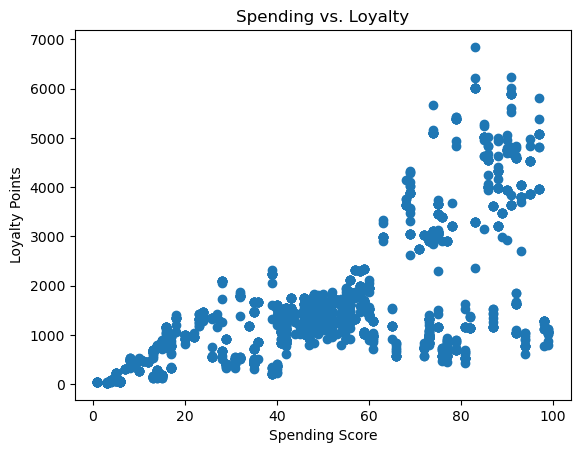

In [29]:
# Scatter plot displaying the relation of loyalty points & spending score
plt.figure
plt.scatter(df1["spending_score"], df1[
            "loyalty_points"])

plt.title("Spending vs. Loyalty")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points")

plt.show()

In [30]:
# Define the dependent variable.
y = df1["loyalty_points"].values.reshape(-1, 1)

# Define the independent variable.
x = df1["spending_score"].values.reshape(-1, 1)

# Create model.
lm = linear_model.LinearRegression()
lm.fit(x, y) 

LinearRegression()

In [31]:
# Create function to get OLS Regression Results
def get_ols(y, x):
    model = sm.OLS(y, sm.add_constant(x)).fit()
    print(model.summary())
    return model

# Get OLS Regression Results
ols_results = get_ols(y, x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.92e-263
Time:                        10:16:07   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.0527     45.931     -1.634      0.1

In [32]:
# Create function & extract the estimated parameters.
def extract_parameters(lm, x, y):
    print("R-squared value: ", lm.score(x, y)) 
    print("Intercept value: ", lm.intercept_) 
    print("Coefficient value: ", lm.coef_)

extract_parameters(lm, x, y)

# Create function & extract the standard errors.
def extract_standard_errors(ols_results):
    intercept_se = ols_results.bse[0]
    coefficient_se = ols_results.bse[1]
    print("Intercept Standard Error: ", intercept_se)
    print("Coefficient Standard Error: ", coefficient_se)
    return intercept_se, coefficient_se 

intercept_se, coefficient_se = extract_standard_errors(ols_results)

R-squared value:  0.4520008865838909
Intercept value:  [-75.05266293]
Coefficient value:  [[33.06169326]]
Intercept Standard Error:  45.93055405556938
Coefficient Standard Error:  0.8144185085135343


In [33]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = ols_results.predict(sm.add_constant(x)) 
intercept = ols_results.params[0]
coefficient = ols_results.params[1]

# Create a regression table for coefficients and standard errors
regression_table = pd.DataFrame({"Coefficient": [
    intercept, coefficient],"Standard Error": [
    intercept_se, coefficient_se]}, index=[
    "Intercept", "Spending Score"])

regression_table

Coefficient  Standard Error
Intercept        -75.052663       45.930554
Spending Score    33.061693        0.814419

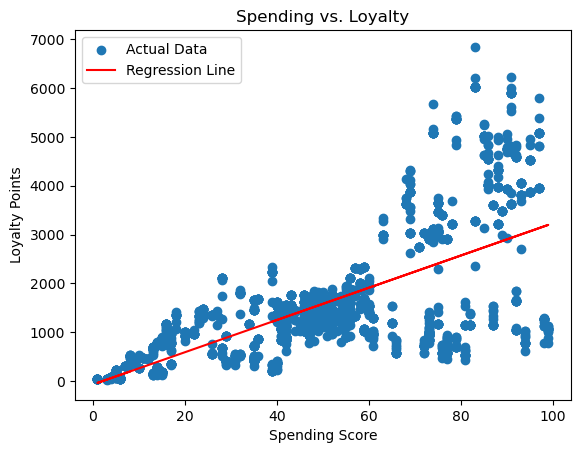

In [34]:
# Scatter plot with regression line to visualise prediction
plt.scatter(x, y, label="Actual Data") 
plt.plot(x, y_pred, color="red", label="Regression Line")

plt.title("Spending vs. Loyalty")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

plt.legend()
plt.show()

### 5b) income vs loyalty

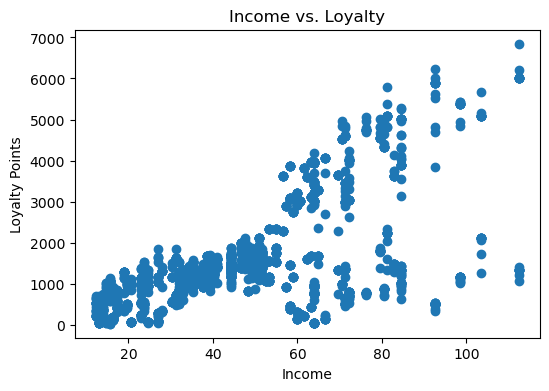

In [36]:
# Create a scatter plot displaying the relation of the variables
plt.figure(figsize=(6, 4))
plt.scatter(df1["income"], df1["loyalty_points"])

plt.title("Income vs. Loyalty")
plt.xlabel("Income")
plt.ylabel("Loyalty Points")

plt.show()

In [37]:
# Define the dependent variable.
y = df1["loyalty_points"].values.reshape(-1, 1)

# Define the independent variable.
x = df1["income"].values.reshape(-1, 1)

# Create model and print summary of metrics.
lm = linear_model.LinearRegression()
lm.fit(x, y) 

LinearRegression()

In [38]:
# Get OLS Regression Results
ols_results = get_ols(y, x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):          2.43e-209
Time:                        10:16:07   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.6865     52.171     -1.259      0.2

In [39]:
# Extract the estimated parameters.
extract_parameters(lm, x, y)

# Extract the standard errors.
intercept_se, coefficient_se = extract_standard_errors(ols_results)

R-squared value:  0.3795357732793634
Intercept value:  [-65.6865128]
Coefficient value:  [[34.18782549]]
Intercept Standard Error:  52.17071742983615
Coefficient Standard Error:  0.9779254568320984


In [40]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = ols_results.predict(sm.add_constant(x)) 

intercept = ols_results.params[0]
coefficient = ols_results.params[1]

# Create a regression table for coefficients and standard errors
regression_table = pd.DataFrame({"Coefficient": [
    intercept, coefficient],"Standard Error": [
    intercept_se, coefficient_se]}, index=[
    "Intercept", "Income"])

regression_table

Coefficient  Standard Error
Intercept   -65.686513       52.170717
Income       34.187825        0.977925

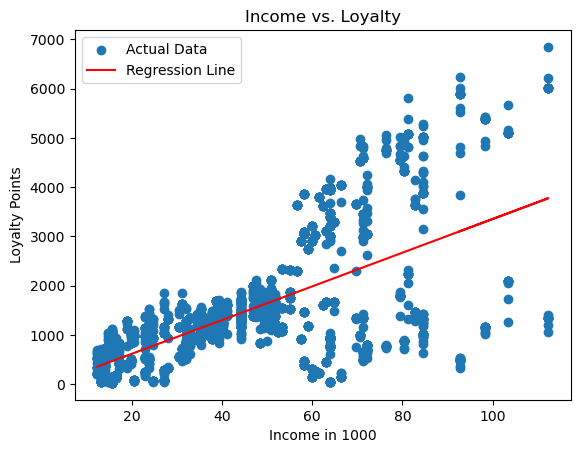

In [41]:
# Scatter plot with regression line to visualise predictions
plt.scatter(x, y, label="Actual Data") 
plt.plot(x, y_pred, color = "red", label="Regression Line")

plt.title("Income vs. Loyalty")
plt.xlabel("Income in 1000")
plt.ylabel("Loyalty Points") 

plt.legend()
plt.show() 

### 5c) age vs loyalty

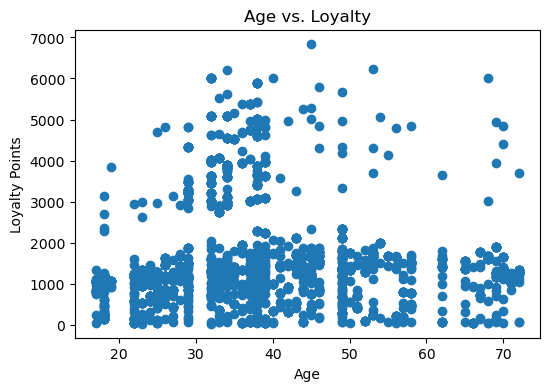

In [43]:
# Create a scatter plot displaying the relation of the variables
plt.figure(figsize=(6, 4))
plt.scatter(df1["age"], df1["loyalty_points"])

plt.title("Age vs. Loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

plt.show()

In [44]:
# Define the dependent variable.
y = df1["loyalty_points"].values.reshape(-1, 1)

# Define the independent variable.
x = df1["age"].values.reshape(-1, 1)

# Create model and print summary of metrics.
lm = linear_model.LinearRegression()
lm.fit(x, y) 

LinearRegression()

In [45]:
# Get OLS Regression Results
ols_results = get_ols(y, x) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 14 Apr 2025   Prob (F-statistic):             0.0577
Time:                        10:16:07   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1736.5177     88.249     19.678      0.0

In [46]:
# Extract the estimated parameters.
extract_parameters(lm, x, y)

# Extract the standard errors.
intercept_se, coefficient_se = extract_standard_errors(ols_results)

R-squared value:  0.0018015480437203468
Intercept value:  [1736.5177394]
Coefficient value:  [[-4.01280515]]
Intercept Standard Error:  88.24873115454396
Coefficient Standard Error:  2.1131768876430828


In [47]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = ols_results.predict(sm.add_constant(x)) 

intercept = ols_results.params[0]
coefficient = ols_results.params[1]

# Create a regression table for coefficients and standard errors
regression_table = pd.DataFrame({"Coefficient": [
    intercept, coefficient],"Standard Error": [
    intercept_se, coefficient_se]}, index=[
    "Intercept", "Spending Score"])

regression_table

Coefficient  Standard Error
Intercept       1736.517739       88.248731
Spending Score    -4.012805        2.113177

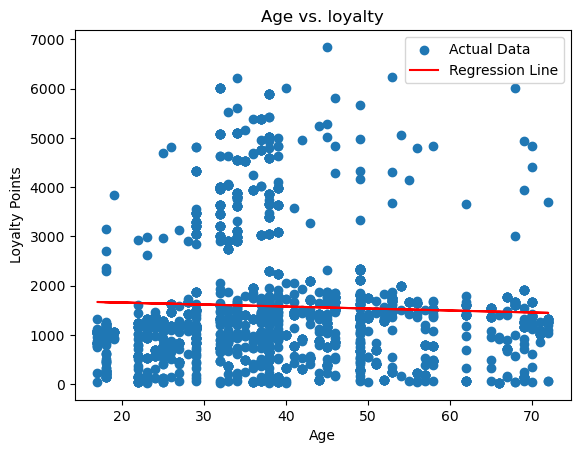

In [48]:
# Scatter plot with regression line to visualise predictions.
plt.scatter(x, y, label="Actual Data") 
plt.plot(x, y_pred, color = "red", label="Regression Line")

plt.title("Age vs. loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty Points") 

plt.legend()
plt.show() 

### 5d) Multi linear regression model

In [50]:
# Define the dependent variable.
y = df1["loyalty_points"] 

# Define the independent variables.
x = df1[["spending_score", "income", "age"]] 

# Create model.
mlr = linear_model.LinearRegression()
mlr.fit(x, y) 

LinearRegression()

In [51]:
# Create test and train set.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

# Train the model on the training data
model = sm.OLS(y_train, x_train).fit()

# Make predictions on the test set
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2846.
Date:                Mon, 14 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:16:08   Log-Likelihood:                -12246.
No. Observations:                1600   AIC:                         2.450e+04
Df Residuals:                    1596   BIC:                         2.452e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2197.0105     58.134    -37.

In [52]:
# Extract the estimated parameters.
print("Train R-squared value: ", model.rsquared)  
print("Intercept value: ", model.params.iloc[0])

print("Coefficient values: \n", model.params[1:])  

Train R-squared value:  0.8424891786265964
Intercept value:  -2197.0105106183973
Coefficient values: 
 spending_score    33.968073
income            34.245656
age               11.013695
dtype: float64


In [53]:
# Create function to calculate and print performance metrics
def evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred):
    
    # Training metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Testing metrics
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Print results
    print(f"Train MSE: {mse_train:.3f}")
    print(f"Train MAE: {mae_train:.3f}")
    print(f"Train R²: {r2_train:.6f}")
    print()
    print(f"Test MSE: {mse_test:.3f}")
    print(f"Test MAE: {mae_test:.3f}")
    print(f"Test R²: {r2_test:.6f}")
    return r2_train, r2_test

# Calculate and print performance metrics
r2_train, r2_test = evaluate_regression_model(
    y_train, y_train_pred, y_test, y_test_pred)

Train MSE: 260165.531
Train MAE: 393.812
Train R²: 0.842489

Test MSE: 277188.702
Test MAE: 402.235
Test R²: 0.829072


In [54]:
# Compare train and test R² to check for overfitting
print(f"R² Difference (Train - Test): {r2_train - r2_test:.6f}")

intercept_se = model.bse.iloc[0]
coefficient_se = model.bse.iloc[1] 

R² Difference (Train - Test): 0.013417


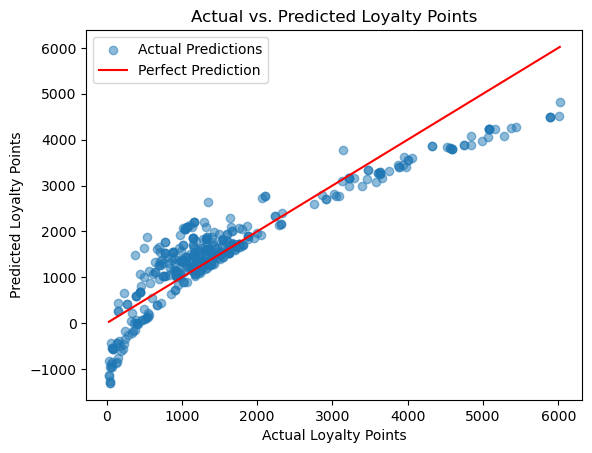

In [55]:
# Scatter plot to visualise accuracy of predictions vs. actuals
plt.scatter(y_test, y_test_pred, alpha=0.5, label="Actual Predictions")
plt.xlabel("Actual Loyalty Points")
plt.ylabel("Predicted Loyalty Points")
plt.title("Actual vs. Predicted Loyalty Points")

plt.plot([min(y_test), max(y_test)], 
         [min(y_test), max(y_test)], 
         color="red", label="Perfect Prediction")

plt.legend()
plt.show()

In [56]:
# Vif calculation to detect multicollinearity
x_with_const = sm.add_constant(x)

vif_data = pd.DataFrame()
vif_data["Feature"] = x_with_const.columns

vif_data["VIF"] = [variance_inflation_factor(x_with_const.values, i) 
                   for i in range(x_with_const.shape[1])]

vif_data["VIF"] = vif_data["VIF"].round(2)

print(vif_data)

          Feature    VIF
0           const  20.77
1  spending_score   1.05
2          income   1.00
3             age   1.05


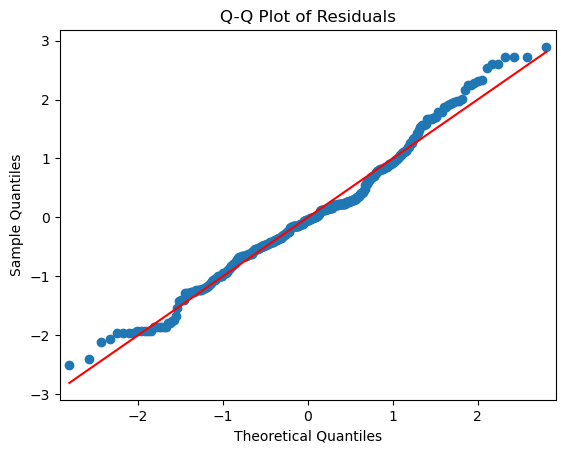

In [57]:
# Q-Q Plot to check normality of residuals
residuals = y_test - y_test_pred

sm.qqplot(residuals, line="s", fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()

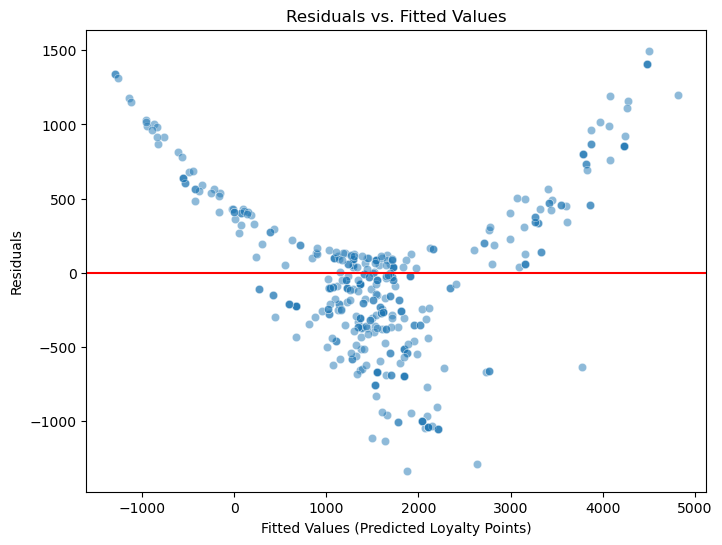

In [58]:
# Scatter plot to check for heteroscedasticity
fitted_values_test = model.predict(x_test)
residuals_test = y_test - fitted_values_test

plt.figure(figsize=(8, 6))
sns.scatterplot(x=fitted_values_test, y=residuals_test, alpha=0.5)
plt.axhline(y=0, color="red")
plt.xlabel("Fitted Values (Predicted Loyalty Points)")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

## 6. Observations and insights

Creating separate linear regression models for income, age & spending score showed big impact of income & spending score
but very low impact of age. Creating a multilinear regression model, shows that age now gained in value for predicting 
future values alongside the other numerical factors. 

Predictions are less than 90% accurate with the multilinear regression model, suggesting that the categorical factors should be 
taken into account. Heteroscedasticity has been detected, making the model not the best suitable for predictions.

The question how customers accumulate loyalty points cannot be answered with certainty with the given data. An assumption
could be that the more they spend, the more loyalty points they get, which would explain why there is such a high
correlation between spending score and loyalty points.

So far potential target groups could be above average income and spending score. 

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [63]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


# Settings for the notebook.
plt.rcParams['figure.figsize'] = [15, 10]

In [64]:
# Create your new DataFrame, exclude product, review and summary.
df2 = reviews_cleaned[[
    "gender", "education", "loyalty_points","spending_score", 
    "age", "income"]].copy()
df2.head()

gender education  loyalty_points  spending_score  age  income
0    Male  graduate             210              39   18   12.30
1    Male  graduate             524              81   23   12.30
2  Female  graduate              40               6   22   13.12
3  Female  graduate             562              77   25   13.12
4  Female  graduate             366              40   33   13.94

In [65]:
# Specify Y.
y = df2["loyalty_points"]

# Specify X.
x = df2[["gender", "education"]]

In [66]:
# Encode 'gender and education
x = pd.get_dummies(x, columns=["gender", "education"], drop_first=True)

In [67]:
# Review X.
x.head()

gender_Male  education_PhD  education_diploma  education_graduate  \
0         True          False              False                True   
1         True          False              False                True   
2        False          False              False                True   
3        False          False              False                True   
4        False          False              False                True   

   education_postgraduate  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

In [68]:
# Split the data into test and train data.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Make predictions
y_test_pred = model.predict(x_test)

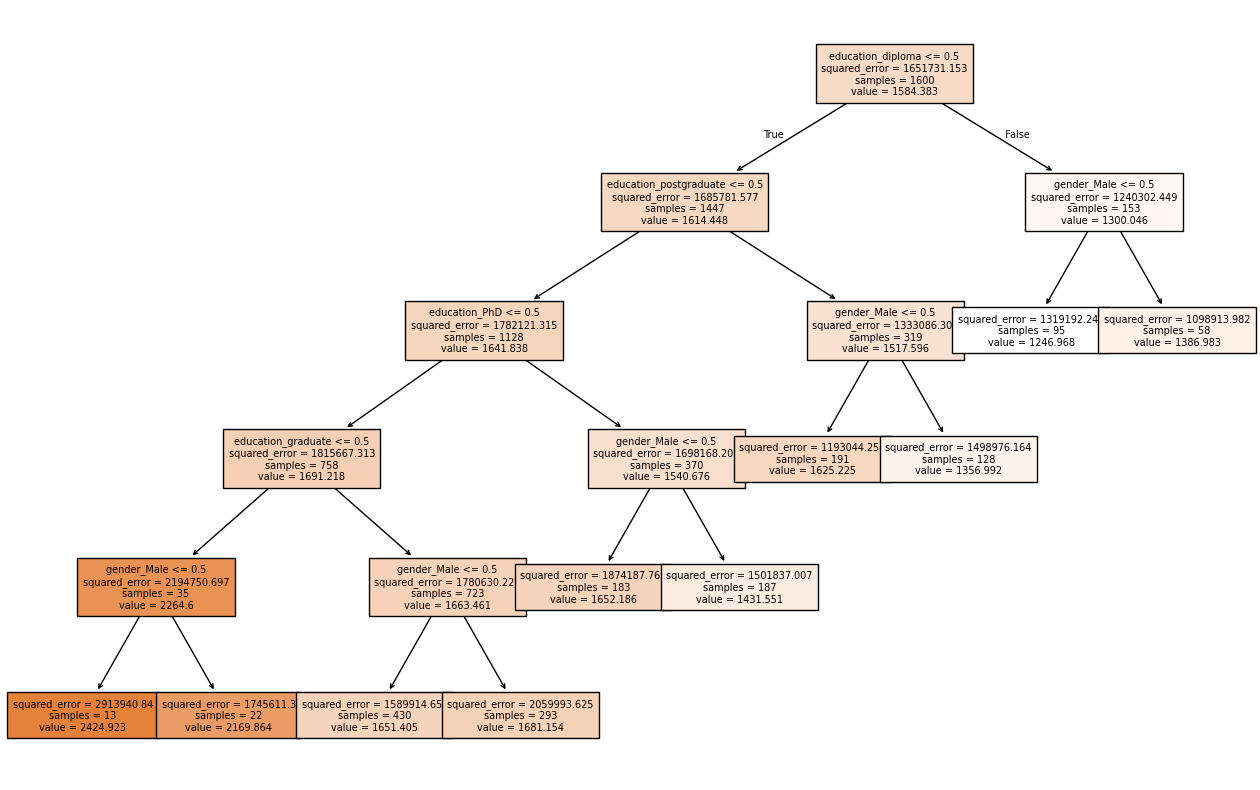

In [69]:
# Fit and plot final model.
fig, ax = plt.subplots(figsize=(16, 10))
plot_tree(model, filled=True, fontsize=7, feature_names=x.columns)
plt.show()

In [70]:
# Evaluate performance of the unpruned model
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

Model - MSE: 1597112.88, MAE: 906.30, R²: 0.0151


In [71]:
# Compare test and train set to identify potential overfitting
r2_train, r2_test = evaluate_regression_model(
    y_train, y_train_pred, y_test, y_test_pred)

Train MSE: 260165.531
Train MAE: 393.812
Train R²: 0.842489

Test MSE: 1597112.882
Test MAE: 906.295
Test R²: 0.015145


In [72]:
# Add more factors to x in order to improve the decision tree model

# Specify Y.
y = df2["loyalty_points"]

# Specify X.
x = df2.drop(columns=["loyalty_points"])

In [73]:
# Encode 'gender' and 'education'
x = pd.get_dummies(x, columns=["gender", "education"], drop_first=True)

In [74]:
# Review X.
x

spending_score  age  income  gender_Male  education_PhD  \
0                 39   18   12.30         True          False   
1                 81   23   12.30         True          False   
2                  6   22   13.12        False          False   
3                 77   25   13.12        False          False   
4                 40   33   13.94        False          False   
...              ...  ...     ...          ...            ...   
1995              69   37   84.46        False           True   
1996               8   43   92.66        False           True   
1997              91   34   92.66         True          False   
1998              16   34   98.40         True           True   
1999               8   32   92.66         True           True   

      education_diploma  education_graduate  education_postgraduate  
0                 False                True                   False  
1                 False                True                   False  
2                 False                True                   False  
3                 False                True                   False  
4                 False                True                   False  
...                 ...                 ...                     ...  
1995              False               False                   False  
1996              False               False                   False  
1997              False                True                   False  
1998              False               False                   False  
1999              False               False                   False  

[2000 rows x 8 columns]

In [75]:
# Split the data into test and train data.
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

# Make predictions
y_test_pred = model.predict(x_test)

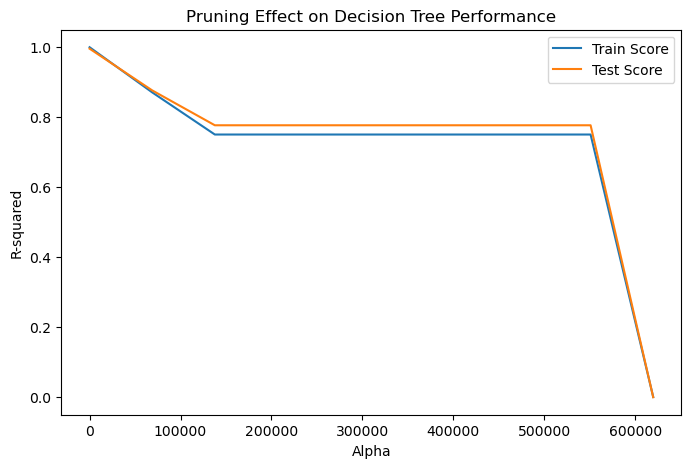

In [76]:
# Define the best pruning strategy
path = model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = np.linspace(min(path.ccp_alphas), max(path.ccp_alphas), 10)

train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    pruned_tree.fit(x_train, y_train)
    
    train_scores.append(pruned_tree.score(x_train, y_train))
    test_scores.append(pruned_tree.score(x_test, y_test))

plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, train_scores, label="Train Score")
plt.plot(ccp_alphas, test_scores, label="Test Score")

plt.xlabel("Alpha")
plt.ylabel("R-squared")
plt.title("Pruning Effect on Decision Tree Performance")
plt.legend()
plt.show()

In [77]:
# Prune the model.
pruned_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
pruned_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

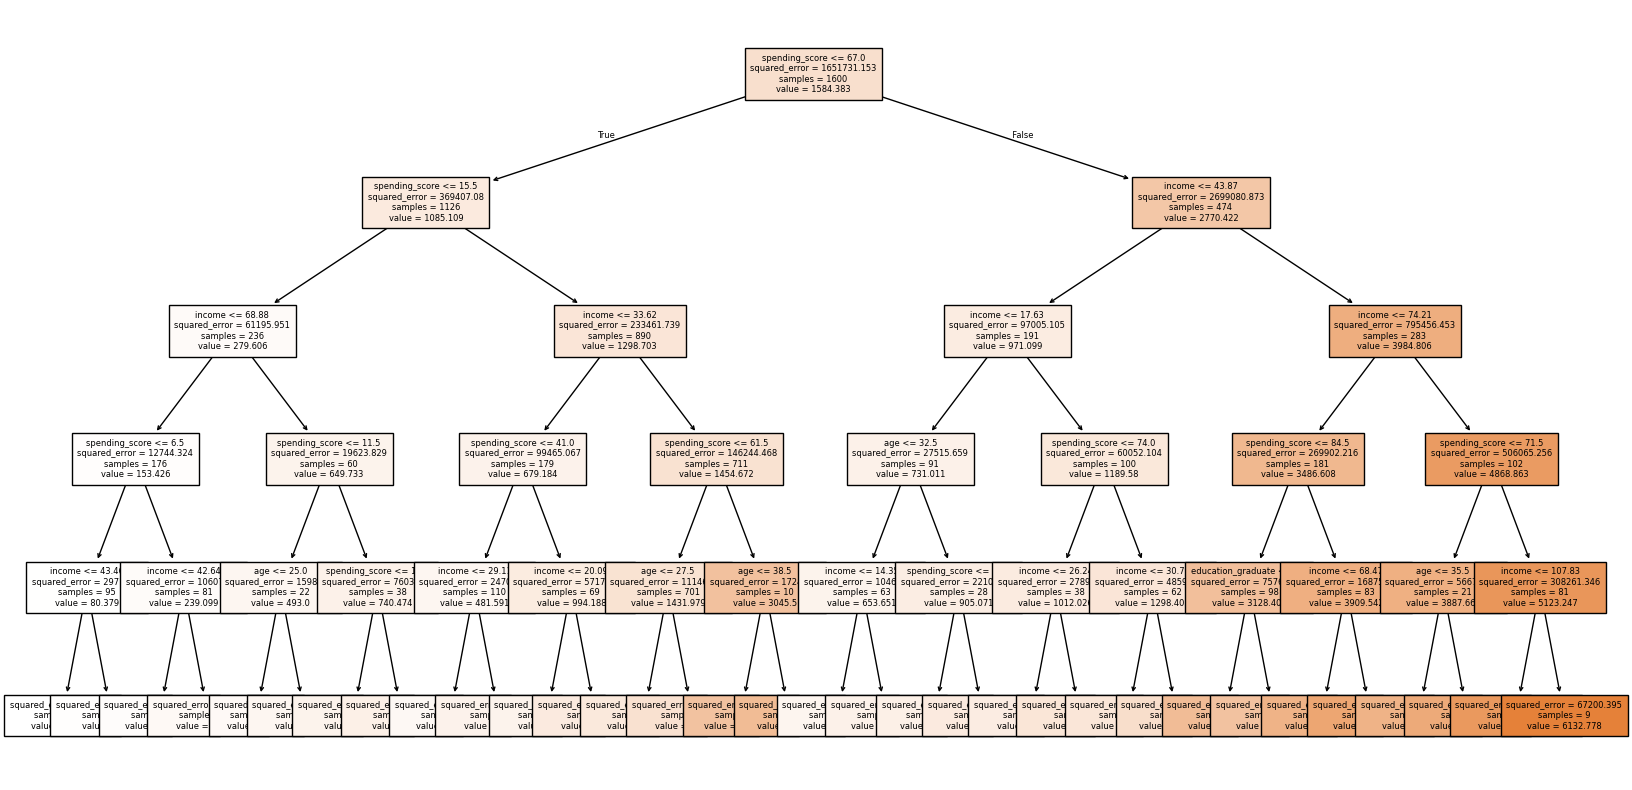

In [78]:
# Fit and plot final model.
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(pruned_regressor, fontsize=6, filled=True, feature_names=x.columns)

plt.show()

In [79]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_pruned = pruned_regressor.predict(x_test)

# Evaluate performance of the unpruned model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Unpruned Model - MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

# Evaluate performance of the pruned model
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
mae_pruned = mean_absolute_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)

print(f"Pruned Model - MSE: {mse_pruned:.2f}, MAE: {
mae_pruned:.2f}, R²: {r2_pruned:.4f}")

Unpruned Model - MSE: 6624.35, MAE: 28.98, R²: 0.9959
Pruned Model - MSE: 78832.82, MAE: 189.91, R²: 0.9514


In [80]:
# Compare test and train set to identify potential overfitting
y_test_pred = model.predict(x_test)
r2_train, r2_test = evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred)

Train MSE: 260165.531
Train MAE: 393.812
Train R²: 0.842489

Test MSE: 6624.355
Test MAE: 28.980
Test R²: 0.995915


In [81]:
# Test random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

In [82]:
# Calculate and print performance metrics
evaluate_regression_model(y_train, y_train_pred, y_test, y_test_pred)

Train MSE: 746.428
Train MAE: 7.997
Train R²: 0.999548

Test MSE: 7399.963
Test MAE: 23.846
Test R²: 0.995437


(0.9995480936987206, 0.9954368331862743)

In [83]:
# Evaluate performance of the model.
cv_scores = cross_val_score(rf_model, x, y, cv=5, scoring="r2")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R²: {cv_scores.mean():.4f}")


Cross-Validation R² Scores: [0.99999843 0.99999843 0.99999843 0.98860287 0.98460979]
Mean R²: 0.9946


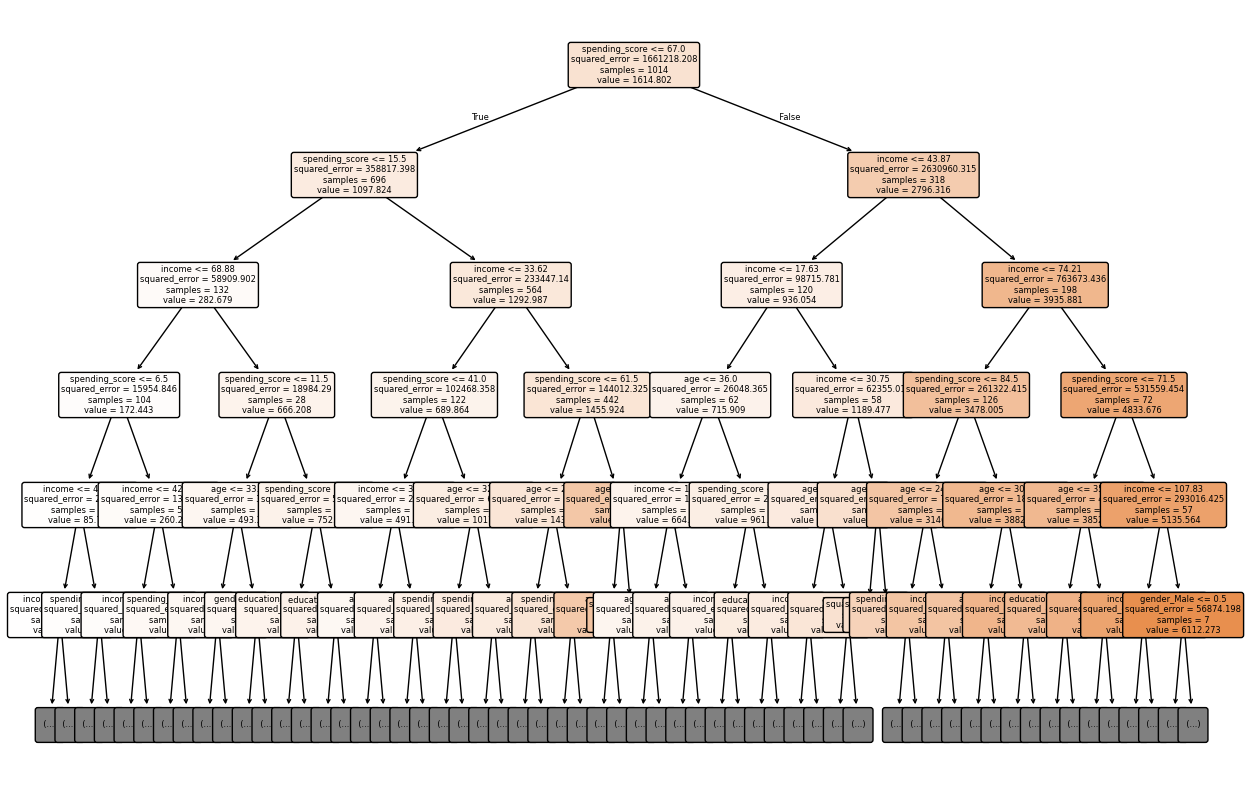

In [84]:
# Plot a single tree from the random forest
single_tree = rf_model.estimators_[0]

plt.figure(figsize=(15,10))
plot_tree(single_tree, feature_names=x.columns, filled=True, 
          rounded=True, fontsize=6, max_depth=5)
plt.show()

In [85]:
# Retrieve feature importance from model
importance = pd.Series(rf_model.feature_importances_, index=x.columns)
importance.sort_values(ascending=False)

spending_score            0.500774
income                    0.481825
age                       0.015163
education_graduate        0.000615
gender_Male               0.000565
education_PhD             0.000437
education_diploma         0.000361
education_postgraduate    0.000260
dtype: float64

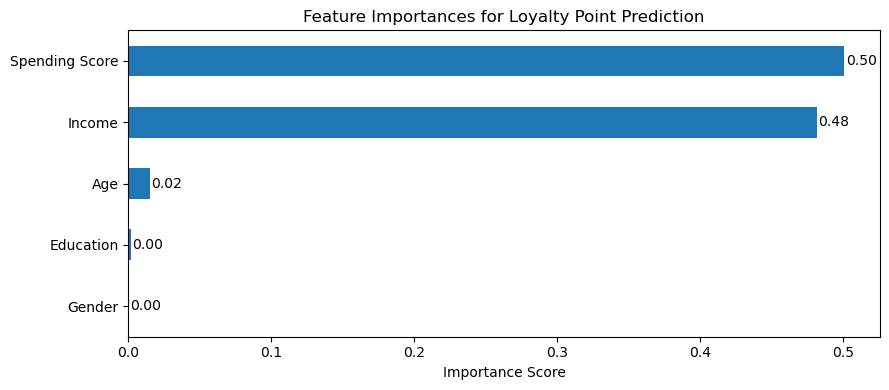

In [86]:
# Plot feature importance

rename_dict = {"spending_score": "Spending Score", "income": "Income",
    "age": "Age", "gender_Male": "Gender"}

education_features = set(importance.index) - set(rename_dict.keys())
education_importance = importance.loc[list(education_features)].sum()

importance_renamed = importance.loc[rename_dict.keys()].rename(rename_dict)
importance_renamed["Education"] = education_importance
importance_final = importance_renamed.sort_values()

plt.figure(figsize=(9, 4))
ax = importance_final.plot(kind="barh")
plt.title("Feature Importances for Loyalty Point Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()

for i, v in enumerate(importance_final):
    plt.text(v + 0.001, i, f"{v:.2f}", va="center")

plt.show()

## Discuss: Insights and observations

decision tree with only the categorical factors gender and education was not giving any valuable relation to the loyalty points, so this model didnt perform at all. I did another model adding the numerical factors spending_score, age and income which then created an overfitting model, however with better performance. So i went for a random forest model and this turned out to be the best fitting model in order to predict loyalty point accumulation.

Importance score shows that gender and education are not influencing the loyalty points in any way that can be quantified. So income, age and spending_score is where we need to put our focus towards from all the factors we have looked at so far.

# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [91]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [92]:
# Load the CSV file(s) as df3.
df3 = reviews_cleaned.drop(columns=["review", "summary"]).copy()
df3.head()

gender  age  income  spending_score  loyalty_points education  product
0    Male   18   12.30              39             210  graduate      453
1    Male   23   12.30              81             524  graduate      466
2  Female   22   13.12               6              40  graduate      254
3  Female   25   13.12              77             562  graduate      263
4  Female   33   13.94              40             366  graduate      291

In [93]:
# Explore the data.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income          2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 109.5+ KB


In [94]:
# Descriptive statistics.
df3.describe()

age       income  spending_score  loyalty_points       product
count  2000.000000  2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000    48.079060       50.000000     1578.032000   4320.521500
std      13.573212    23.123984       26.094702     1283.239705   3148.938839
min      17.000000    12.300000        1.000000       25.000000    107.000000
25%      29.000000    30.340000       32.000000      772.000000   1589.250000
50%      38.000000    47.150000       50.000000     1276.000000   3624.000000
75%      49.000000    63.960000       73.000000     1751.250000   6654.000000
max      72.000000   112.340000       99.000000     6847.000000  11086.000000

## 2. Plot

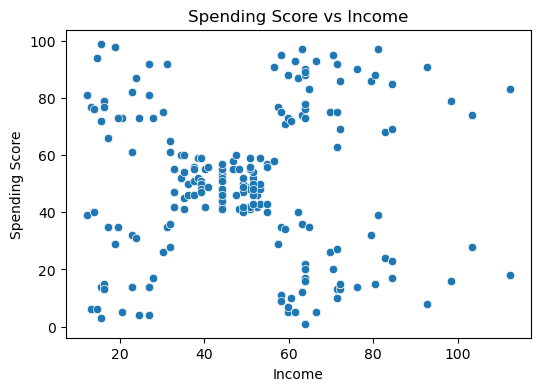

In [96]:
# Create a scatterplot with Seaborn.
plt.figure(figsize=(6, 4))
sns.scatterplot(x="income", y="spending_score", data=df3, 
                palette="colorblind")

plt.title("Spending Score vs Income")
plt.xlabel("Income")
plt.ylabel("Spending Score")

plt.show()

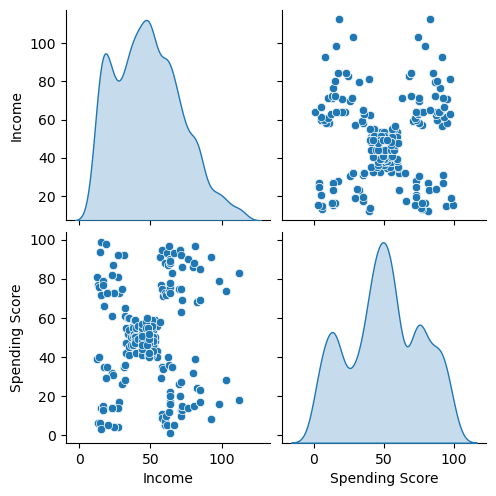

In [97]:
# Create a pairplot with Seaborn.
df3_copy = df3.rename(columns={
    "income": "Income","spending_score": "Spending Score"})

sns.pairplot(df3_copy, vars=["Income", "Spending Score"],
    diag_kind="kde", palette="colorblind")

plt.show()

## 3. Elbow and silhoutte methods

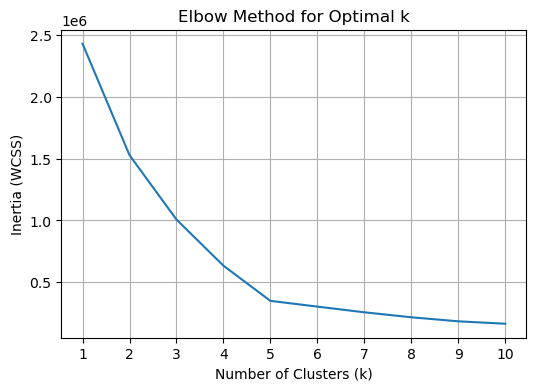

In [99]:
# Determine the number of clusters: Elbow method.

features = ["income", "spending_score"]
clustering_features = df3[features].copy()

k_values = range(1, 11)
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, 
                    init="k-means++", n_init=10)
    kmeans.fit(clustering_features)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia_values)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

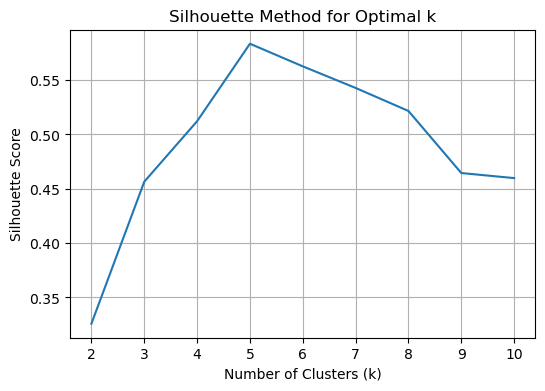

In [100]:
# Determine the number of clusters: Silhouette method.
features = ["income", "spending_score"]
clustering_features = df3[features].copy()

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++", n_init=10)
    labels = kmeans.fit_predict(clustering_features)
    score = silhouette_score(clustering_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

## 4. Evaluate k-means model at different values of *k*

In [102]:
# Fit the final k-means model with the selected number of clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", n_init=10)
df3["cluster"] = kmeans.fit_predict(clustering_features)

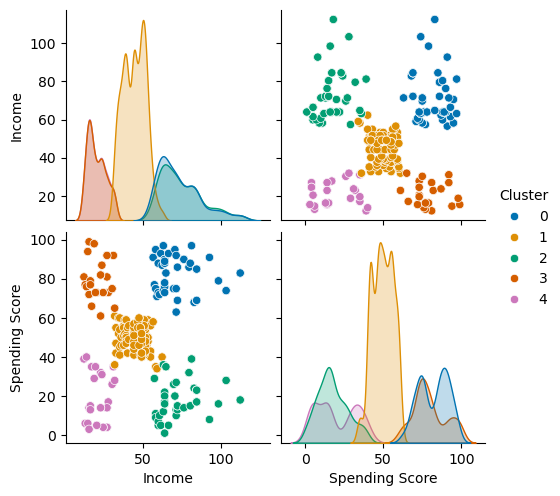

In [103]:
# Create a pairplot to visualize clusters
df3_copy["Cluster"] = df3["cluster"]

sns.pairplot(df3_copy, vars=["Income", "Spending Score"],
    diag_kind="kde", hue="Cluster", palette="colorblind", hue_order=range(optimal_k))

plt.show()

In [104]:
# Fit the final k-means model with the selected number of clusters
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", n_init=10)
df3["cluster"] = kmeans_final.fit_predict(clustering_features)

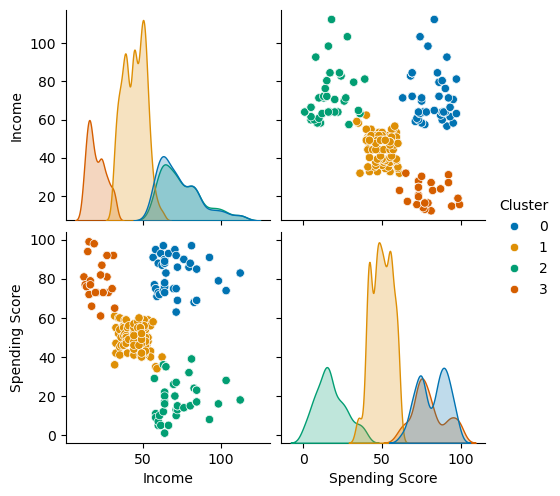

In [105]:
# Create a pairplot to visualize clusters
sns.pairplot(df3_copy, vars=["Income", "Spending Score"],
    diag_kind="kde", hue="Cluster", palette="colorblind", hue_order=range(optimal_k))

plt.show()

## 5. Fit final model and justify your choice

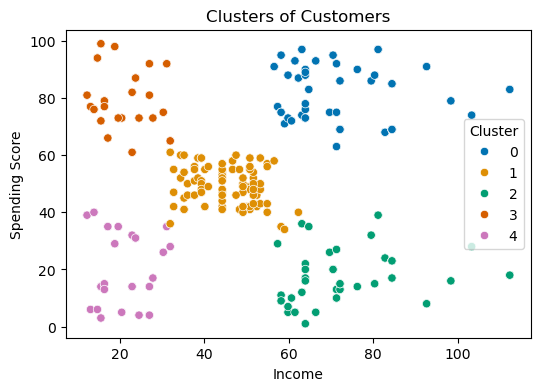

In [107]:
# Apply the final model.
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, 
                      init="k-means++", n_init=10)
df3["cluster"] = kmeans_final.fit_predict(clustering_features)

plt.figure(figsize=(6, 4))
sns.scatterplot(x="income", y="spending_score", data=df3, 
                hue="cluster", palette="colorblind", hue_order=range(optimal_k))
plt.title("Clusters of Customers")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

In [108]:
# Check the number of observations per predicted cluster.
cluster_counts = df3["cluster"].value_counts().sort_index()
print(cluster_counts)

cluster
0    356
1    774
2    330
3    269
4    271
Name: count, dtype: int64


In [109]:
# Map cluster numbers to useful names
cluster_names = {
    0: "High Income, High Spending",
    1: "Mid Income, Mid Spending",
    2: "High Income, Low Spending",
    3: "Low Income, High Spending",
    4: "Low Income, Low Spending"}

df3["cluster_label"] = df3["cluster"].map(
    cluster_names)

df3.head()

gender  age  income  spending_score  loyalty_points education  product  \
0    Male   18   12.30              39             210  graduate      453   
1    Male   23   12.30              81             524  graduate      466   
2  Female   22   13.12               6              40  graduate      254   
3  Female   25   13.12              77             562  graduate      263   
4  Female   33   13.94              40             366  graduate      291   

   cluster              cluster_label  
0        4   Low Income, Low Spending  
1        3  Low Income, High Spending  
2        4   Low Income, Low Spending  
3        3  Low Income, High Spending  
4        4   Low Income, Low Spending

## 6. Plot and interpret the clusters

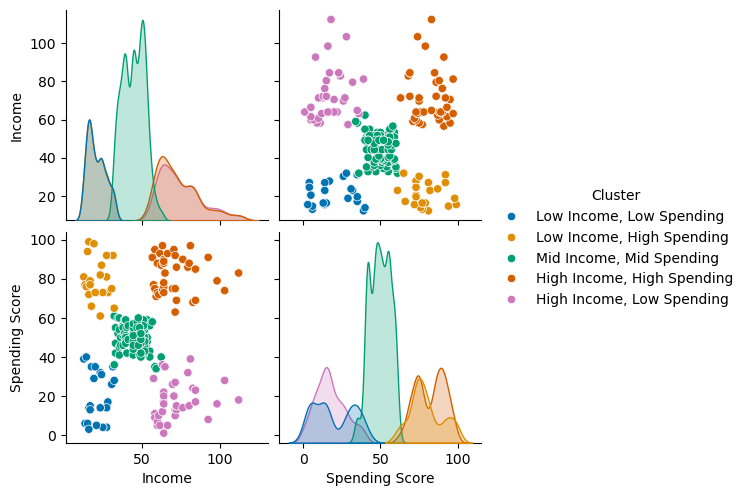

In [111]:
# Create a pairplot with Seaborn.
df3_copy["Cluster"] = df3["cluster_label"]

sns.pairplot(df3_copy, vars=["Income", "Spending Score"],
    diag_kind="kde", hue="Cluster", palette="colorblind")

plt.show()

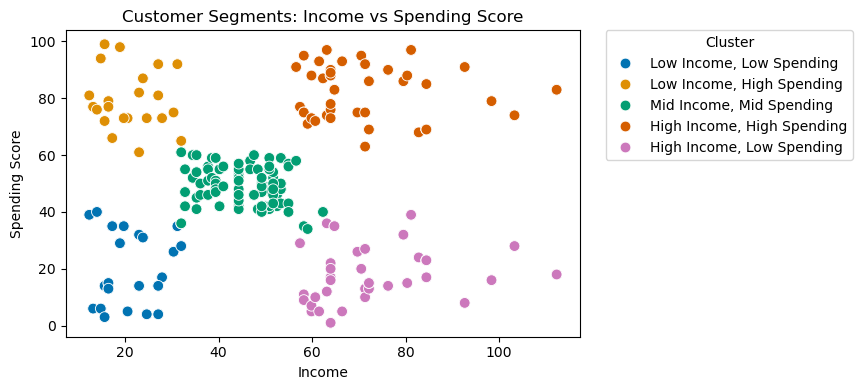

In [112]:
# Create scatterplot for stakeholder presentation
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df3_copy,
    x="Income",
    y="Spending Score",
    hue="Cluster",
    palette="colorblind",
    s=60)

plt.title("Customer Segments: Income vs Spending Score", fontsize=12)
plt.tight_layout()
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), 
           loc="upper left", borderaxespad=0.)

plt.show()

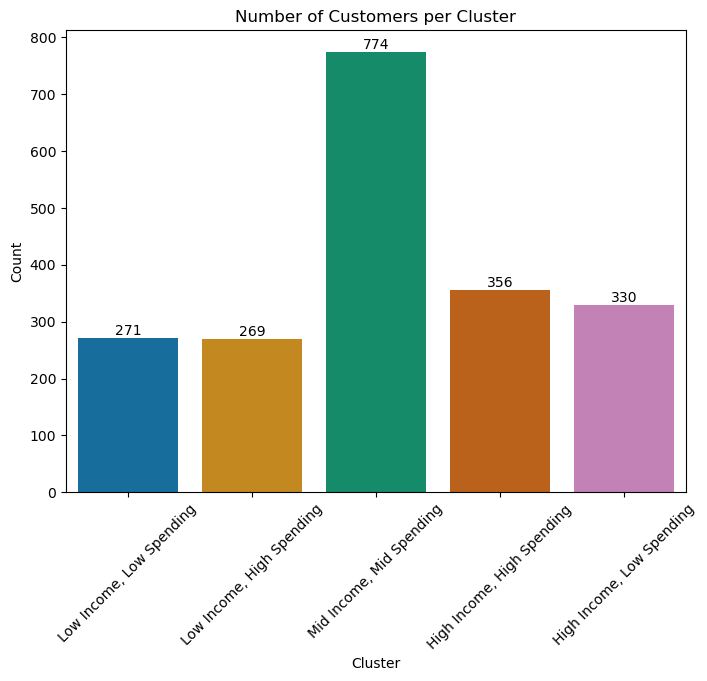

In [113]:
# Create barplot to display number of customers per cluster
plt.figure(figsize=(8, 6))

sns.countplot(x=df3["cluster_label"], palette="colorblind")

for bar in plt.gca().containers:
    plt.gca().bar_label(bar, fmt="%d")

plt.title("Number of Customers per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

In [114]:
# Group by 'cluster_label' and calculate mean values
def cluster_info(df, cluster_col="cluster_label"):
    return (df.groupby(cluster_col).agg(
            avg_age=("age", "mean"),
            avg_income=("income", "mean"),
            avg_spending_score=("spending_score", "mean"),
            avg_loyalty_points=("loyalty_points", "mean"))
        .round(0).reset_index())

cluster_summary = cluster_info(df3, 
                               cluster_col="cluster_label")
cluster_summary

cluster_label  avg_age  avg_income  avg_spending_score  \
0  High Income, High Spending     36.0        73.0                82.0   
1   High Income, Low Spending     41.0        75.0                17.0   
2   Low Income, High Spending     32.0        20.0                79.0   
3    Low Income, Low Spending     44.0        20.0                20.0   
4    Mid Income, Mid Spending     42.0        44.0                50.0   

   avg_loyalty_points  
0              3988.0  
1               912.0  
2               972.0  
3               275.0  
4              1420.0

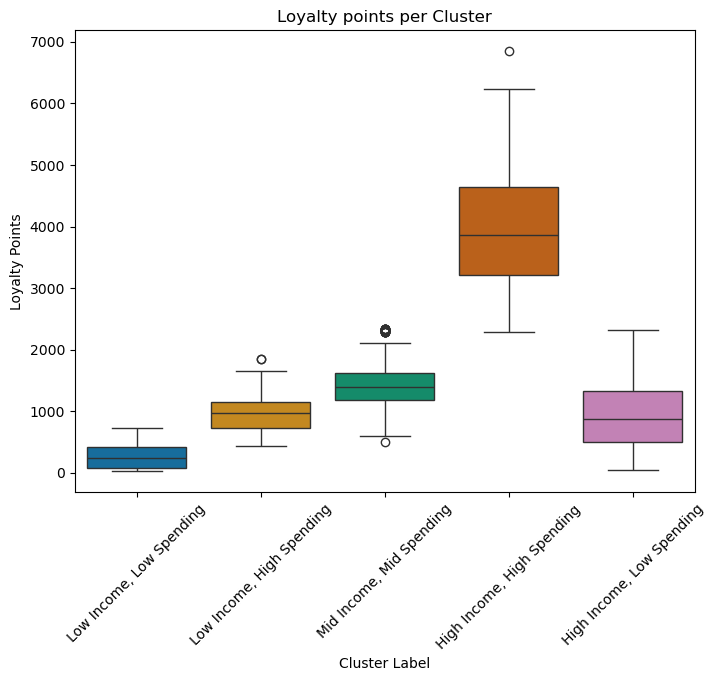

In [115]:
#Create boxplot to display loyalty points per cluster.
plt.figure(figsize=(8, 6))
sns.boxplot(x="cluster_label", y="loyalty_points", data=df3, 
            palette="colorblind")

plt.title("Loyalty points per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Loyalty Points")
plt.xticks(rotation=45)

plt.show()

In [116]:
# Predict cluster for new customer - test
new_customer = [[20, 50]]
predicted_cluster = kmeans_final.predict(new_customer)

predicted_label = cluster_names.get(
    predicted_cluster[0], "Unknown Cluster")

print(f"Predicted Cluster: {predicted_label}")

Predicted Cluster: Mid Income, Mid Spending


In [117]:
# Predict cluster for new customer - test
new_customer = [[60, 20]]
predicted_cluster = kmeans_final.predict(new_customer)

predicted_label = cluster_names.get(
    predicted_cluster[0], "Unknown Cluster")

print(f"Predicted Cluster: {predicted_label}")

Predicted Cluster: High Income, Low Spending


In [118]:
# Predict cluster for new customer - test
new_customer = [[40, 10]]
predicted_cluster = kmeans_final.predict(new_customer)

predicted_label = cluster_names.get(
    predicted_cluster[0], "Unknown Cluster")

print(f"Predicted Cluster: {predicted_label}")

Predicted Cluster: Low Income, Low Spending


In [119]:
# Get top 10 products per cluster
top_products = (
    df3.groupby("cluster_label")["product"].value_counts()
        .groupby(level=0).head(10).reset_index(name="count"))
top_products["best_selling_products"] = top_products.groupby(
    "cluster_label").cumcount() + 1
pivoted = top_products.pivot(index="best_selling_products", 
                             columns="cluster_label", values="product")

pivoted

cluster_label          High Income, High Spending  High Income, Low Spending  \
best_selling_products                                                          
1                                            3403                       3112   
2                                            4399                       4390   
3                                            4415                       4405   
4                                            6504                       6507   
5                                            8923                       8933   
6                                            8962                       9064   
7                                            9080                       3158   
8                                            2457                       3277   
9                                            2518                       3711   
10                                           2795                       4047   

cluster_label          Low Income, High Spending  Low Income, Low Spending  \
best_selling_products                                                        
1                                           2162                      1031   
2                                           2253                      2139   
3                                            195                      2173   
4                                            231                      2261   
5                                            624                       107   
6                                            811                       760   
7                                           1940                      1945   
8                                           1970                      2793   
9                                           2829                      2814   
10                                          3667                      3657   

cluster_label          Mid Income, Mid Spending  
best_selling_products                            
1                                           978  
2                                           999  
3                                          4459  
4                                          6215  
5                                          6233  
6                                          9507  
7                                          9529  
8                                          9530  
9                                          9596  
10                                          249

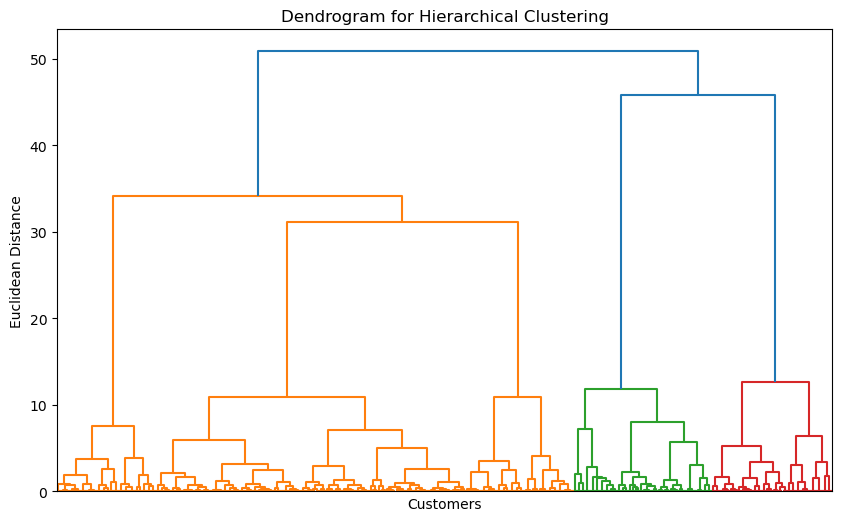

In [120]:
# Test hierarchical clustering to see differences/similarities in results
features = ["income", "spending_score"]
clustering_features = df3[features].copy()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

cb_palette = sns.color_palette("colorblind", 6)
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(
    sch.linkage(scaled_features, method="ward"), no_labels=True)

plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

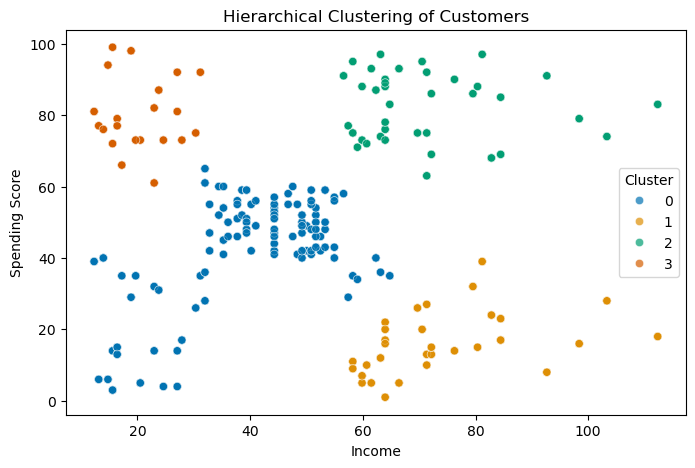

In [121]:
# Step 4: Fit Clustering with optimal_k determined visually
optimal_k = 4
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
df3["hierarchical_cluster"] = hierarchical.fit_predict(scaled_features)

unscaled = scaler.inverse_transform(scaled_features)
df3["income_unscaled"] = unscaled[:, 0]
df3["spending_score_unscaled"] = unscaled[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="income_unscaled", y="spending_score_unscaled",
    hue="hierarchical_cluster", data=df3, palette="colorblind",
    alpha=0.7)

plt.title("Hierarchical Clustering of Customers")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

## Observations
Spending score and income give 5 good pillars showing relation of the two factors. Low income & low spending, 
low income & high spending, high income & low spending, high income & high spending, mid income & spending. 
4 pillars would also be good, because it moves the less defined "mid range" to one of the other options. Hierachrical
model actually splits it into 4 pillars, however, the 5th group is so distinct on the graph and they are a big group by customer count,
it doesnt seem intuitive to group them with the other 4 pillars. Silhouette method confirms 5 pillars as best.

whilst exploring the svm for making predictions, i noticed that it is quite good at making predictions, however, it shows
weakness due to the limiting nature of clusters. it classified a customer with income 40, spending score 10 as low income low spending,
but a customer with income 20 and spending score 50 as mid income mid spending. but the income in the 2nd customer was signigifantly
lower. 

The 5 pillars offer plenty of opportunity for targeted marketing strategies such as VIP program for the high income & high spending, 
discounts for low income & low spending, etc. In the future we could also look at the type of items which are popular within each cluster and advertise similar items.

## 7. Further exploration with clustering

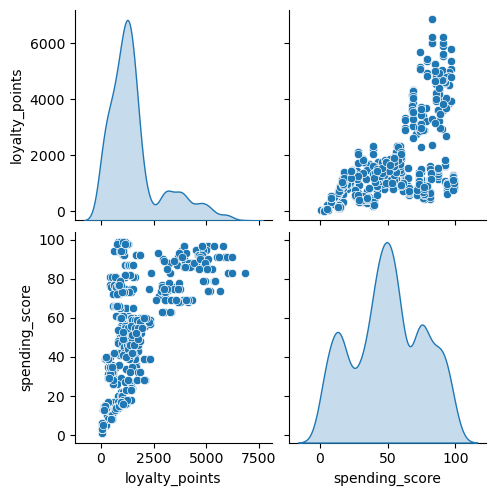

In [124]:
# Clustering loyalty points and spending score with k means
# Create a pairplot
sns.pairplot(df3, vars=["loyalty_points", "spending_score"], 
             diag_kind="kde", palette="colorblind")

plt.show()

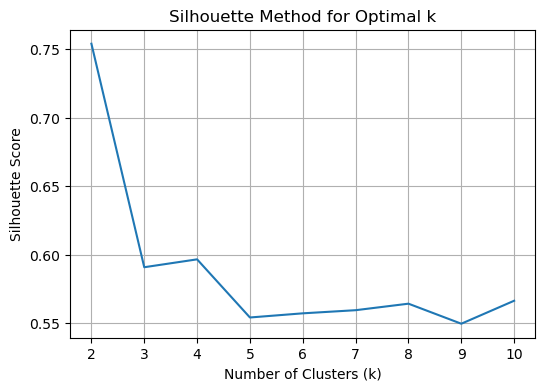

In [125]:
# Determine the number of clusters: Silhouette method.
features = ["loyalty_points", "spending_score"]
clustering_features = df3[features].copy()

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, 
                    init="k-means++", n_init=10)
    labels = kmeans.fit_predict(clustering_features)
    score = silhouette_score(clustering_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [126]:
# Fit the final k-means model with the selected number of clusters
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, 
                      random_state=42, init="k-means++", 
                      n_init=10)
df3["spending_loyalty_cluster"] = kmeans_final.fit_predict(
    clustering_features)

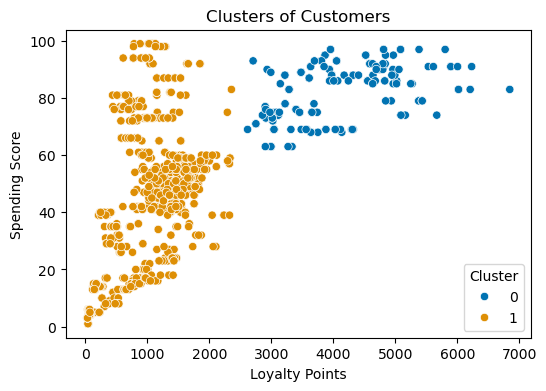

In [127]:
# Plot the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df3["loyalty_points"], y=df3[
                "spending_score"], hue=df3["spending_loyalty_cluster"], 
                palette="colorblind")
plt.title("Clusters of Customers")
plt.xlabel("Loyalty Points")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

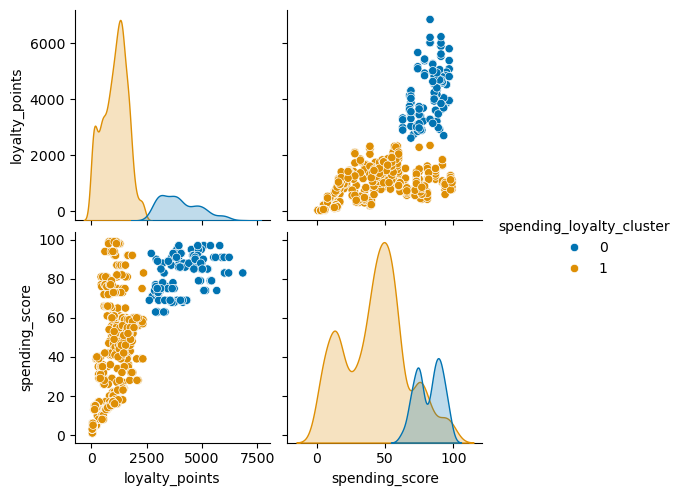

In [128]:
# Create a pairplot with Seaborn.
sns.pairplot(df3, vars=["loyalty_points", "spending_score"], 
             hue="spending_loyalty_cluster", diag_kind="kde", 
             palette="colorblind")

plt.show()

In [129]:
# Group by 'cluster' and calculate mean values
summary_cluster = cluster_info(df3, cluster_col="spending_loyalty_cluster")
summary_cluster

spending_loyalty_cluster  avg_age  avg_income  avg_spending_score  \
0                         0     36.0        73.0                82.0   
1                         1     40.0        43.0                43.0   

   avg_loyalty_points  
0              3998.0  
1              1058.0

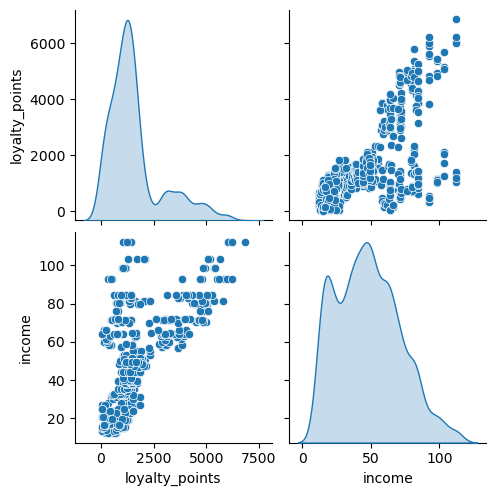

In [130]:
# Clustering loyalty points and income with k means
# Create a pairplot.
sns.pairplot(df3, vars=["loyalty_points", "income"], diag_kind="kde", 
             palette="colorblind")

plt.show()

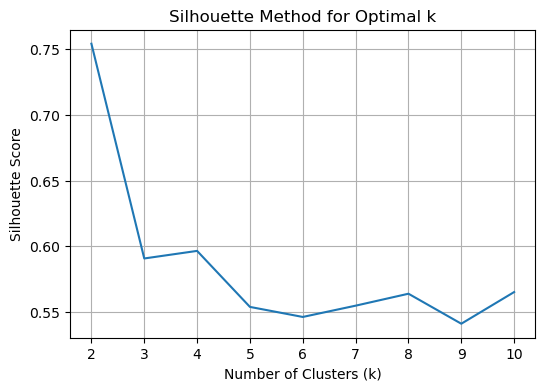

In [131]:
# Determine the number of clusters: Silhouette method.
features = ["loyalty_points", "income"]
clustering_features = df3[features].copy()

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, 
                    init="k-means++", n_init=10)
    labels = kmeans.fit_predict(clustering_features)
    score = silhouette_score(clustering_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [132]:
# Fit the final k-means model with the selected number of clusters
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, 
                      init="k-means++", n_init=10)
df3["income_loyalty_cluster"] = kmeans_final.fit_predict(clustering_features)

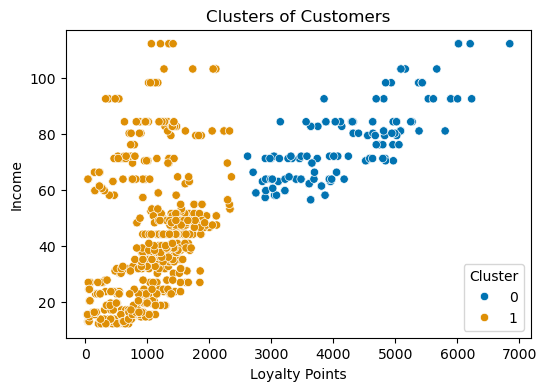

In [133]:
# Plot the clusters.
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df3["loyalty_points"], y=df3["income"], 
                hue=df3["income_loyalty_cluster"], palette="colorblind")
plt.title("Clusters of Customers")
plt.xlabel("Loyalty Points")
plt.ylabel("Income")
plt.legend(title="Cluster")
plt.show()

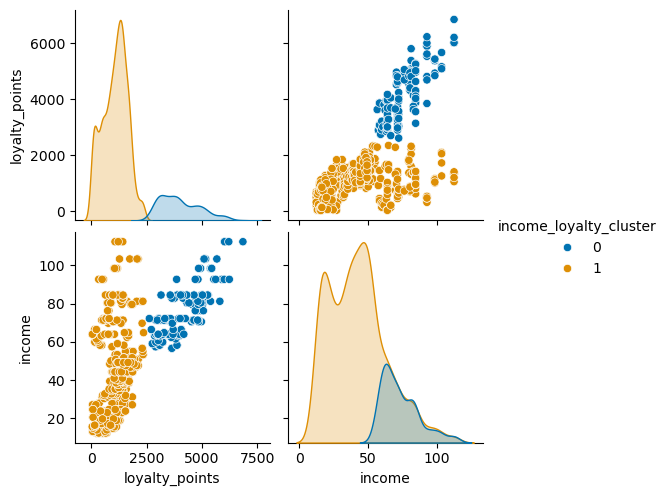

In [134]:
# Create a pairplot.
sns.pairplot(df3, vars=["loyalty_points", "income"], 
             hue="income_loyalty_cluster",diag_kind="kde", palette="colorblind")

plt.show()

In [135]:
# Group by 'cluster' and calculate mean values
summary_cluster = cluster_info(df3, cluster_col="income_loyalty_cluster")
summary_cluster

income_loyalty_cluster  avg_age  avg_income  avg_spending_score  \
0                       0     36.0        73.0                82.0   
1                       1     40.0        43.0                43.0   

   avg_loyalty_points  
0              3998.0  
1              1058.0

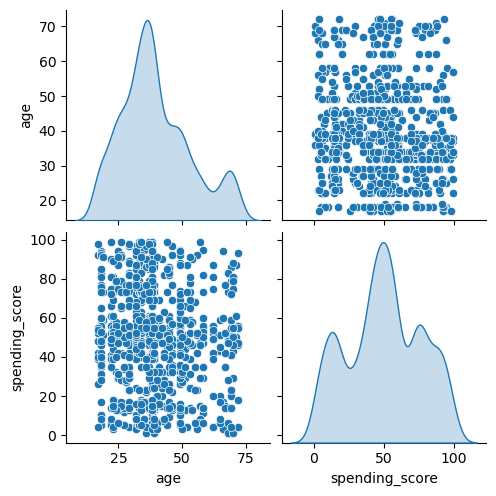

In [136]:
# Clustering age & spending score with k means
# Create a pairplot.
sns.pairplot(df3, vars=["age", "spending_score"], diag_kind="kde", 
             palette="colorblind")

plt.show()

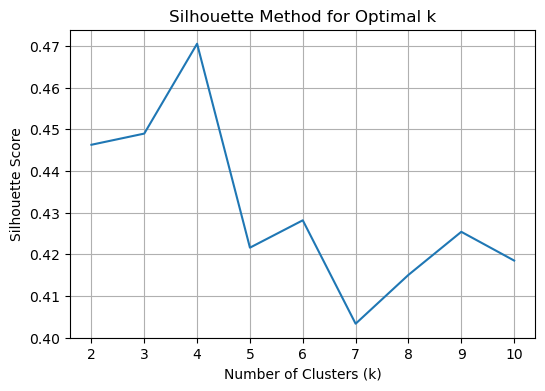

In [137]:
# Determine the number of clusters: Silhouette method.
features = ["age", "spending_score"]
clustering_features = df3[features].copy()

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, 
                    init="k-means++", n_init=10)
    labels = kmeans.fit_predict(clustering_features)
    score = silhouette_score(clustering_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [138]:
# Fit the final k-means model with the selected number of clusters
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, 
                      init="k-means++", n_init=10)
df3["age_spending_cluster"] = kmeans_final.fit_predict(
    clustering_features)

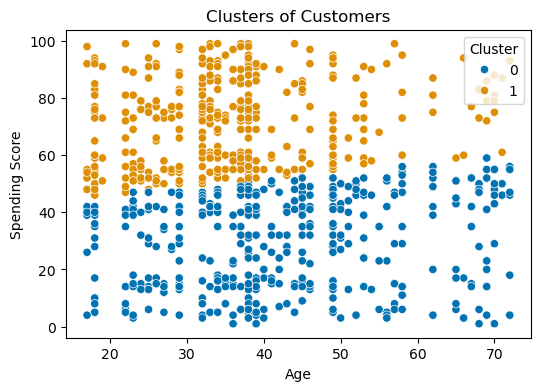

In [139]:
# Plot the clusters
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df3["age"], y=df3["spending_score"], 
                hue=df3["age_spending_cluster"], palette="colorblind")
plt.title("Clusters of Customers")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend(title="Cluster")
plt.show()

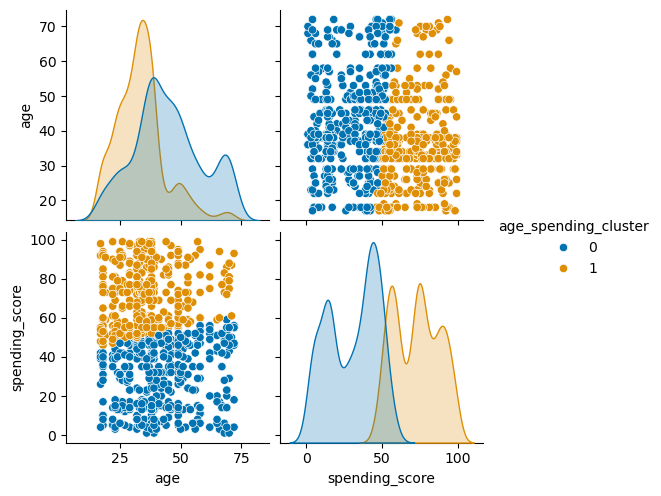

In [140]:
# Create a pairplot.
sns.pairplot(df3, vars=["age", "spending_score"], 
             hue="age_spending_cluster",diag_kind="kde", palette="colorblind")

plt.show()

In [141]:
# Group by 'cluster' and calculate mean values
summary_cluster = cluster_info(df3, cluster_col="age_spending_cluster")
summary_cluster

age_spending_cluster  avg_age  avg_income  avg_spending_score  \
0                     0     45.0        48.0                30.0   
1                     1     33.0        48.0                72.0   

   avg_loyalty_points  
0               952.0  
1              2297.0

In [142]:
# Clustering income, age & spending score with k means
features = df3[["income", "spending_score", "age"]]  

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

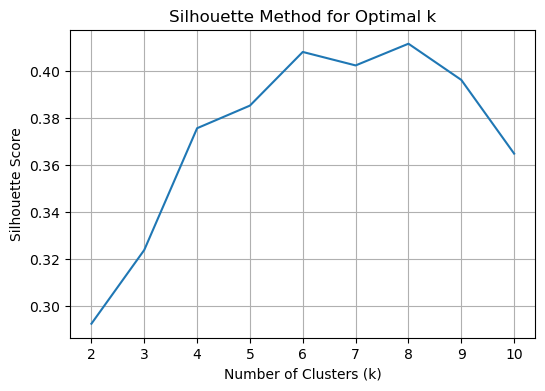

In [143]:
# Determine the number of clusters: Silhouette method.
clustering_features = pd.DataFrame(scaled_features, 
                                   columns=features.columns)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, 
                    init="k-means++", n_init=10)
    labels = kmeans.fit_predict(clustering_features)
    score = silhouette_score(clustering_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [144]:
# Fit the final k-means model with the selected number of clusters
optimal_k = 8
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, 
                      init="k-means++", n_init=10)
df3["age_spending_income_cluster"] = kmeans_final.fit_predict(
    clustering_features)

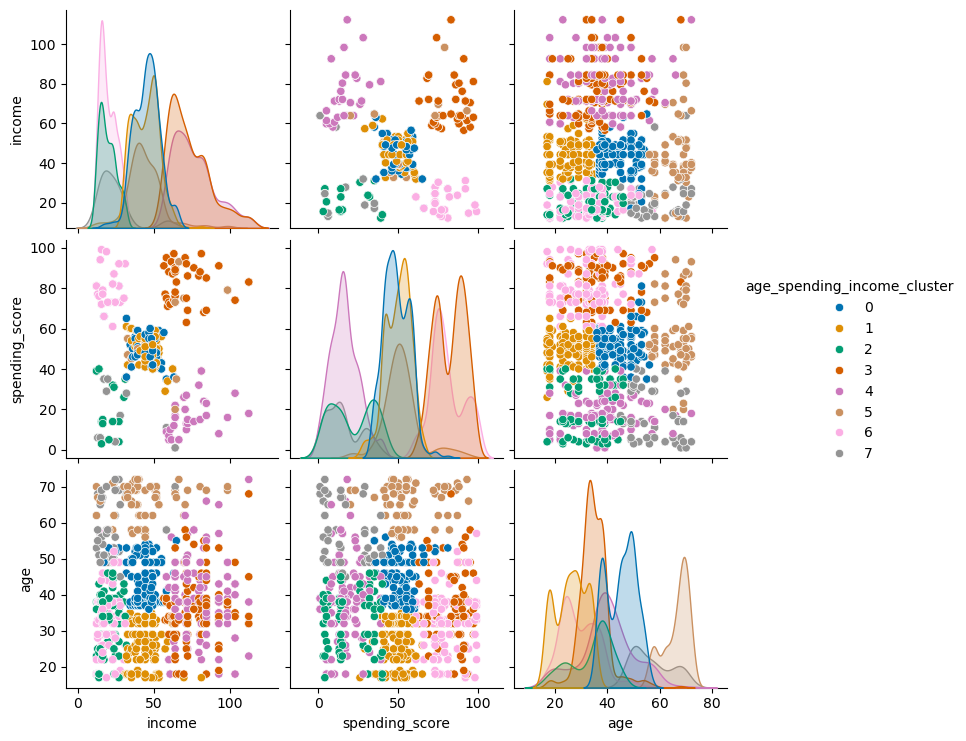

In [145]:
# Create a pairplot with clustering information
sns.pairplot(df3, vars=["income", "spending_score", "age"], 
             hue="age_spending_income_cluster", palette="colorblind", 
             diag_kind="kde")

plt.show()

In [146]:
# Group by 'cluster' and calculate mean values
summary_cluster = cluster_info(df3, cluster_col="age_spending_income_cluster")
summary_cluster

age_spending_income_cluster  avg_age  avg_income  avg_spending_score  \
0                            0     45.0        45.0                49.0   
1                            1     26.0        44.0                50.0   
2                            2     34.0        19.0                21.0   
3                            3     35.0        73.0                82.0   
4                            4     40.0        76.0                16.0   
5                            5     66.0        44.0                52.0   
6                            6     30.0        20.0                80.0   
7                            7     57.0        24.0                16.0   

   avg_loyalty_points  
0              1579.0  
1              1216.0  
2               273.0  
3              3987.0  
4               887.0  
5              1478.0  
6               954.0  
7               256.0

## 7. Discuss: Insights and observations

Explored further potential clusters, none of which seem distinct enough to create clusters for marketing strategies. 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [150]:
!pip install wordcloud
!pip install textblob

# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

In [151]:
# Load the data set as df3.
df4 = reviews_cleaned.copy()
df4.head()

gender  age  income  spending_score  loyalty_points education  product  \
0    Male   18   12.30              39             210  graduate      453   
1    Male   23   12.30              81             524  graduate      466   
2  Female   22   13.12               6              40  graduate      254   
3  Female   25   13.12              77             562  graduate      263   
4  Female   33   13.94              40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [152]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   income          2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [154]:
# Review & Summary: Change all to lower case and join with a space.
df4["review"] = df4["review"].str.lower().str.replace(
    r"\s+", " ", regex=True).str.strip()
df4["summary"] = df4["summary"].str.lower().str.replace(
    r"\s+", " ", regex=True).str.strip()

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [156]:
# Replace all the punctuations in review & summary column.
df4["review"] = df4["review"].str.replace(
    r"[^\w\s]", "", regex=True)
df4["summary"] = df4["summary"].str.replace(
    r"[^\w\s]", "", regex=True)

df4.head()

gender  age  income  spending_score  loyalty_points education  product  \
0    Male   18   12.30              39             210  graduate      453   
1    Male   23   12.30              81             524  graduate      466   
2  Female   22   13.12               6              40  graduate      254   
3  Female   25   13.12              77             562  graduate      263   
4  Female   33   13.94              40             366  graduate      291   

                                              review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

### 2c) Check duplicates in both columns

In [158]:
# Check for duplicates in review column
df4["review"].duplicated().sum()

50

In [159]:
# Display duplicates
df4[df4["review"].duplicated(keep=False)]

gender  age  income  spending_score  loyalty_points     education  \
43    Female   33   31.98              61            1280      graduate   
48    Female   29   32.80              42             842      graduate   
55      Male   45   35.26              41            1062      graduate   
65      Male   19   39.36              59            1060      graduate   
78    Female   25   44.28              52            1281  postgraduate   
...      ...  ...     ...             ...             ...           ...   
1938    Male   18   44.28              53            1028      graduate   
1949    Male   36   46.74              55            1757  postgraduate   
1972    Male   38   16.40              13             149      graduate   
1982    Male   44   84.46              85            5249           PhD   
1998    Male   34   98.40              16            1048           PhD   

      product        review      summary  
43        629     i love it   five stars  
48       2079       love it   five stars  
55       3896         great   five stars  
65       6215     very cute    very cute  
78       1581  good product   five stars  
...       ...           ...          ...  
1938    11084     good game   five stars  
1949     7141    great game   five stars  
1972      453            ok   five stars  
1982      466      fun game  three stars  
1998     1031      fun game   four stars  

[75 rows x 9 columns]

In [160]:
# Check for duplicates in review and product column
df4.duplicated(subset=["review", "product"]).sum()

1

In [161]:
# Display duplicates
df4[df4.duplicated(subset=["review", "product"], keep=False)]

gender  age  income  spending_score  loyalty_points     education  \
811   Female   37   15.58              99            1067  postgraduate   
1006  Female   37   14.76               6              61       diploma   

      product      review     summary  
811      1183  great game  five stars  
1006     1183  great game  five stars

I am keeping all duplicates, the duplicate reviews are in 49 cases for different products and in the 1 case where they are
for the same product, they are placed by different people. With keeping duplicates i ensure the true picture to be displayed.

## 3. Tokenise and create wordclouds

In [164]:
# Apply tokenisation to both columns.
df4["review_tokens"] = df4["review"].apply(word_tokenize)
df4["summary_tokens"] = df4["summary"].apply(word_tokenize)

In [165]:
# Review: Create a word cloud.
all_words_review = " ".join([" ".join(words) 
                             for words in df4["review_tokens"]])
wordcloud_review = WordCloud(
    width=800, height=400, background_color="white", 
    colormap="tab10").generate(all_words_review)

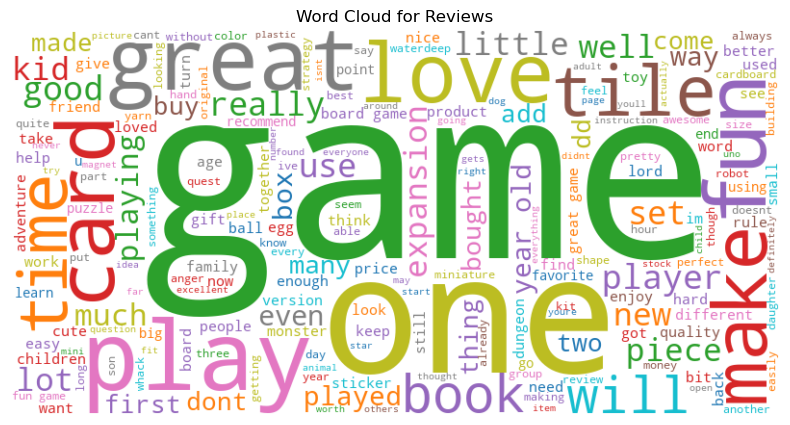

In [166]:
# Review: Plot the Word cloud image.
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_review, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Reviews")
plt.show()

In [167]:
# Summary: Create a word cloud.
all_words_summary = " ".join([" ".join(words) 
                              for words in df4["summary_tokens"]])
wordcloud_summary = WordCloud(
    width=800, height=400, background_color="white", 
    colormap="tab10").generate(all_words_summary)

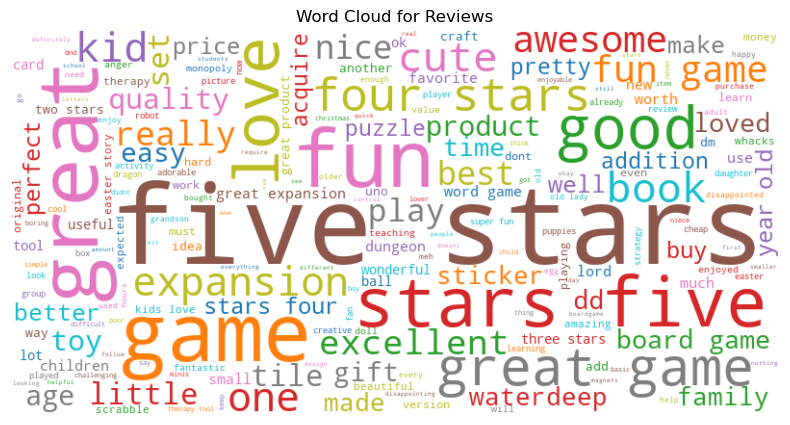

In [168]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_summary, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Reviews")
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [170]:
# Determine the frequency distribution.
all_words_review = [word for tokens in df4[
                    "review_tokens"] for word in tokens]
freq_dist_review = FreqDist(all_words_review)

all_words_summary = [word for tokens in df4[
                     "summary_tokens"] for word in tokens]
freq_dist_summary = FreqDist(all_words_summary)

### 4b) Remove alphanumeric characters and stopwords

In [172]:
# Delete all the alphanum.
df4["clean_review_tokens"] = [[
    word for word in tokens if word.isalpha()] 
                              for tokens in df4["review_tokens"]]
df4["clean_summary_tokens"] = [[
    word for word in tokens if word.isalpha()] 
                               for tokens in df4["summary_tokens"]]

# Print the first few cleaned comments
print(df4["clean_review_tokens"][:5])
print(df4["clean_summary_tokens"][:5])

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, your, unpainted, miniat...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, previous, screens, these,...
Name: clean_review_tokens, dtype: object
0    [the, fact, that, of, this, space, is, wasted,...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: clean_summary_tokens, dtype: object


In [173]:
# Remove all the stopwords
stop_words = set(stopwords.words("english"))

df4["clean_review_tokens"] = [[
    word for word in tokens if word not in stop_words] 
                              for tokens in df4["clean_review_tokens"]]
df4["clean_summary_tokens"] = [[
    word for word in tokens if word not in stop_words] 
                               for tokens in df4["clean_summary_tokens"]]

# Print the first few cleaned comments without stopwords
print(df4["clean_review_tokens"][:5])
print(df4["clean_summary_tokens"][:5])

0    [comes, dms, screen, space, screen, absolute, ...
1    [open, letter, unpainted, miniatures, bad, spe...
2    [nice, art, nice, printing, two, panels, fille...
3       [amazing, buy, bought, gift, new, dm, perfect]
4    [review, previous, screens, completely, unnece...
Name: clean_review_tokens, dtype: object
0    [fact, space, wasted, art, terribly, informati...
1       [another, worthless, dungeon, masters, screen]
2                      [pretty, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: clean_summary_tokens, dtype: object


### 4c) Create wordcloud without stopwords

In [175]:
# Create a wordcloud without stop words.
text_review = " ".join([" ".join(tokens) 
                        for tokens in df4["clean_review_tokens"]])
text_summary = " ".join([" ".join(tokens) 
                         for tokens in df4["clean_summary_tokens"]])

wordcloud_review_cleaned = WordCloud(
    width=800, height=400, background_color="white", 
    colormap="tab10").generate(text_review)
wordcloud_summary_cleaned = WordCloud(
    width=800, height=400, background_color="white", 
    colormap="tab10").generate(text_summary)

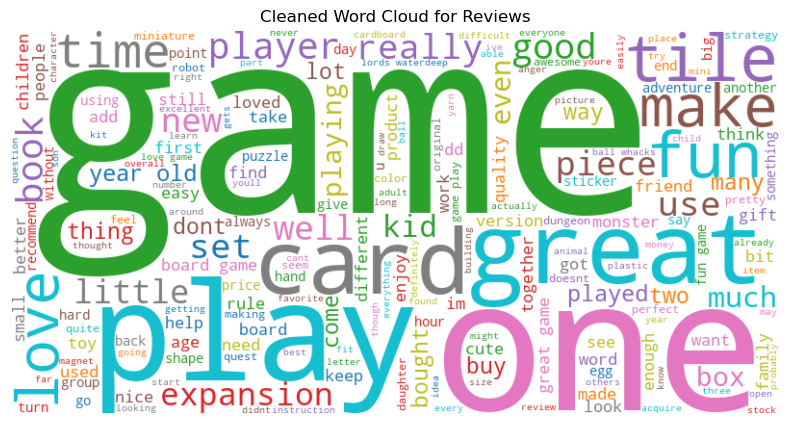

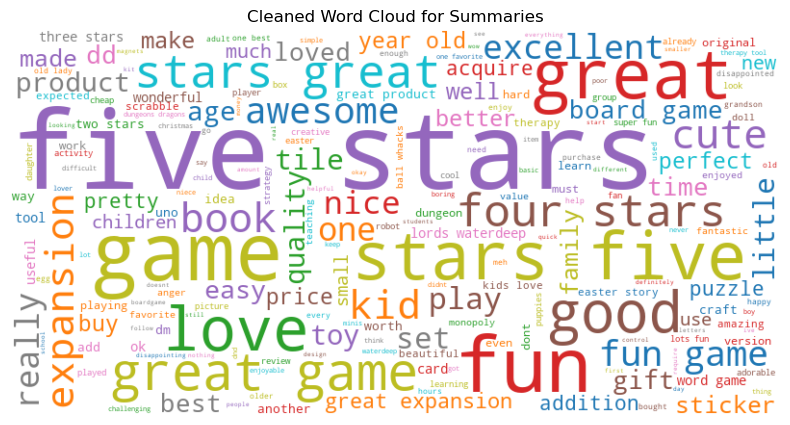

In [176]:
# Plot the wordcloud image for reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_review_cleaned, interpolation="bilinear")
plt.axis("off")
plt.title("Cleaned Word Cloud for Reviews")
plt.show()

# Plot the wordcloud image for summaries
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_summary_cleaned, interpolation="bilinear")
plt.axis("off")
plt.title("Cleaned Word Cloud for Summaries")
plt.show()

### 4d) Identify 15 most common words and polarity

In [178]:
# Determine the 15 most common words in reviews and summaries.
common_words_review = freq_dist_review.most_common(15)
common_words_summary = freq_dist_summary.most_common(15)

print("Most common words in reviews:", common_words_review)
print("Most common words in summaries:", common_words_summary)

Most common words in reviews: [('the', 5452), ('and', 3234), ('to', 3164), ('a', 3161), ('of', 2488), ('i', 2091), ('it', 2090), ('is', 1782), ('this', 1776), ('game', 1685), ('for', 1545), ('with', 1265), ('you', 1177), ('in', 1148), ('that', 1067)]
Most common words in summaries: [('stars', 466), ('five', 381), ('game', 319), ('great', 295), ('the', 261), ('a', 240), ('for', 232), ('fun', 218), ('to', 192), ('and', 168), ('it', 150), ('of', 139), ('this', 135), ('is', 103), ('love', 93)]


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [180]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [181]:
# Determine polarity of both columns. 
df4["review_polarity"] = df4["review"].apply(generate_polarity)
df4["summary_polarity"] = df4["summary"].apply(generate_polarity)

print(df4[["review_polarity", "summary_polarity"]].head())

   review_polarity  summary_polarity
0        -0.036111              0.15
1         0.035952             -0.80
2         0.116640              0.00
3         0.578788              0.00
4        -0.316667              0.00


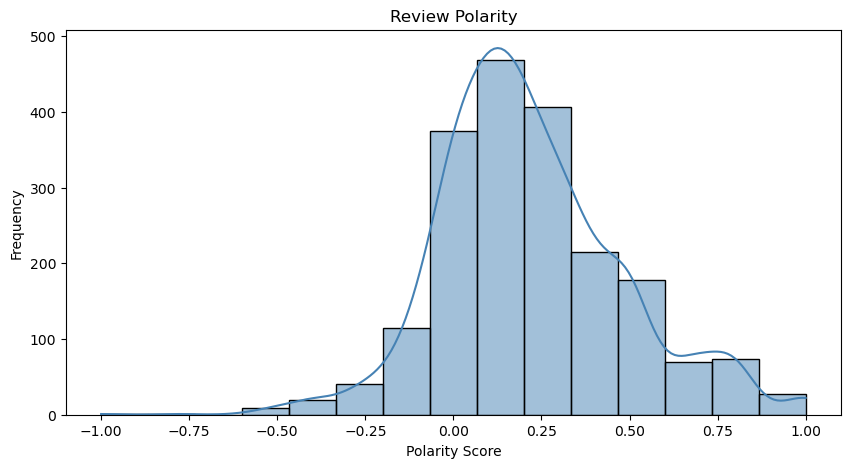

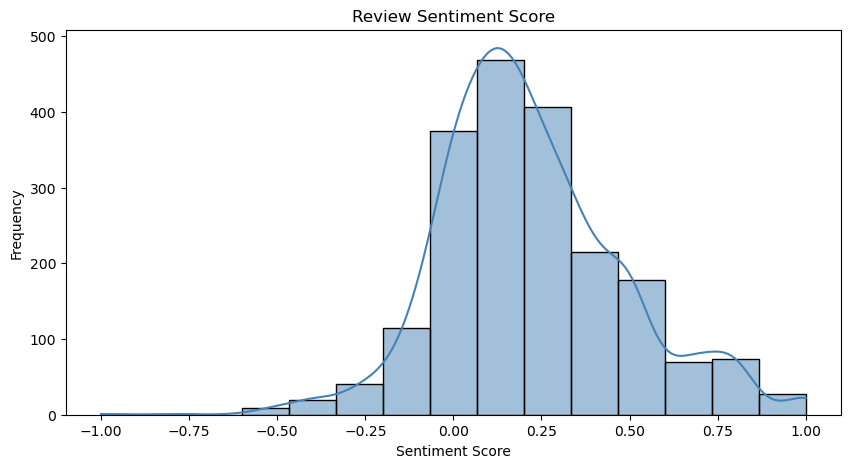

In [182]:
# Histogram of polarity for reviews
plt.figure(figsize=(10, 5))
sns.histplot(df4["review_polarity"], bins=15, kde=True, color="steelblue", 
             line_kws={"color": "black"})
plt.title("Review Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

# Histogram of sentiment score for reviews
plt.figure(figsize=(10, 5))
sns.histplot(df4["review_polarity"], bins=15, kde=True, color="steelblue", 
             line_kws={"color": "black"})
plt.title("Review Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

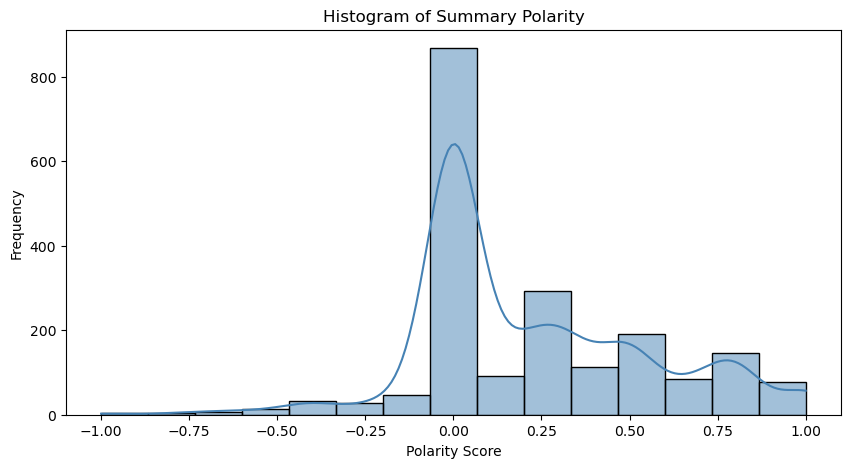

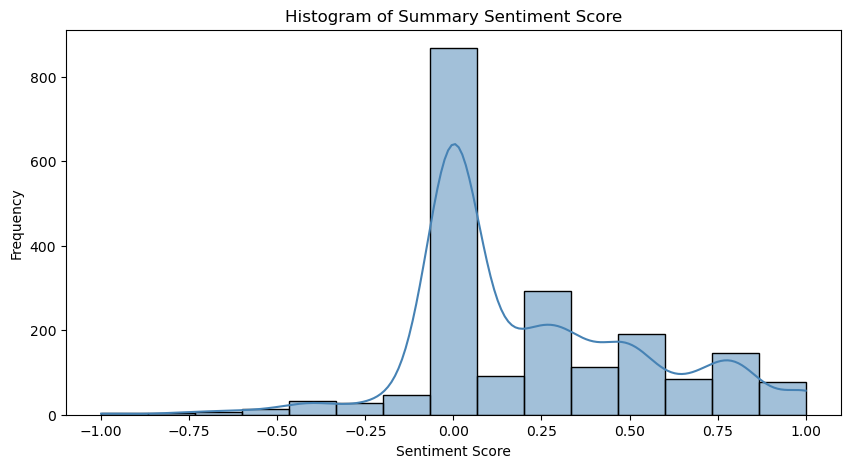

In [183]:
# Histogram of polarity for summaries
plt.figure(figsize=(10, 5))
sns.histplot(df4["summary_polarity"], bins=15, kde=True, color="steelblue", 
             line_kws={"color": "black"})
plt.title("Histogram of Summary Polarity")
plt.xlabel("Polarity Score")
plt.ylabel("Frequency")
plt.show()

# Histogram of sentiment score for summaries
plt.figure(figsize=(10, 5))
sns.histplot(df4["summary_polarity"], bins=15, kde=True, color="steelblue", 
             line_kws={"color": "black"})
plt.title("Histogram of Summary Sentiment Score")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [185]:
# Display the 20 most most negative reviews
top_negative_reviews = df4.nsmallest(
    20, "review_polarity")["review"]

print("Top 20 Negative Reviews")
top_negative_reviews

Top 20 Negative Reviews


208     booo unles you are patient know how to measure...
182                     incomplete kit very disappointing
1804    im sorry i just find this product to be boring...
364     one of my staff will be using this game soon s...
117     i bought this as a christmas gift for my grand...
227     this was a gift for my daughter i found it dif...
230                      i found the directions difficult
290                instructions are complicated to follow
301                                             difficult
1524                           expensive for what you get
174     i sent this product to my granddaughter the po...
347     my 8 yearold granddaughter and i were very fru...
538     i purchased this on the recommendation of two ...
306                   very hard complicated to make these
427                       kids i work with like this game
437     this game although it appears to be like uno a...
497     my son loves playing this game it was recommen...
803           

In [186]:
# Display the 20 most most negative summaries
top_negative_summaries = df4.nsmallest(
    20, "review_polarity")["summary"]

print("Top 20 Negative Summaries")
top_negative_summaries

Top 20 Negative Summaries


208      boring unless you are a craft person which i am 
182                                        incomplete kit
1804                                        disappointing
364                                    anger control game
117                                              stickers
227                                             two stars
230                                           three stars
290                                             two stars
301                                           three stars
1524                                            two stars
174                                        faulty product
347                                            frustating
538                                                  hmmm
306                                              one star
427                                            four stars
437     this game although it appears to be like uno a...
497     it was recommended by a counselor at school th...
803           

In [187]:
# Display the 20 most most positive reviews
top_positive_reviews = df4.nlargest(
    20, "review_polarity")["summary"]

print("Top 20 Positive Reviews")
top_positive_reviews

Top 20 Positive Reviews


7                     five stars
165                   five stars
194                   five stars
496                   five stars
524                   five stars
591                   five stars
609                   five stars
621                   five stars
790                  aquire game
933                   five stars
1037                  five stars
1135                  five stars
1168                  five stars
1177                  five stars
1301                  five stars
1401                  five stars
1550    awesome seller thank you
1609                  five stars
1715                  five stars
1720                 three stars
Name: summary, dtype: object

In [188]:
# Display the 20 most most positive summaries
top_positive_summaries = df4.nlargest(
    20, "review_polarity")["summary"]

print("Top 20 Positive Summaries")
top_positive_summaries

Top 20 Positive Summaries


7                     five stars
165                   five stars
194                   five stars
496                   five stars
524                   five stars
591                   five stars
609                   five stars
621                   five stars
790                  aquire game
933                   five stars
1037                  five stars
1135                  five stars
1168                  five stars
1177                  five stars
1301                  five stars
1401                  five stars
1550    awesome seller thank you
1609                  five stars
1715                  five stars
1720                 three stars
Name: summary, dtype: object

In [189]:
# Display summary table of sentiment scores
polarity_stats = df4["review_polarity"].describe()

polarity_stats_df = polarity_stats.reset_index().round(2)
polarity_stats_df.columns = ["Statistic", "Value"]

print("Summary Table of Review Sentiment Scores:")
print(polarity_stats_df)

Summary Table of Review Sentiment Scores:
  Statistic    Value
0     count  2000.00
1      mean     0.22
2       std     0.26
3       min    -1.00
4       25%     0.05
5       50%     0.18
6       75%     0.36
7       max     1.00


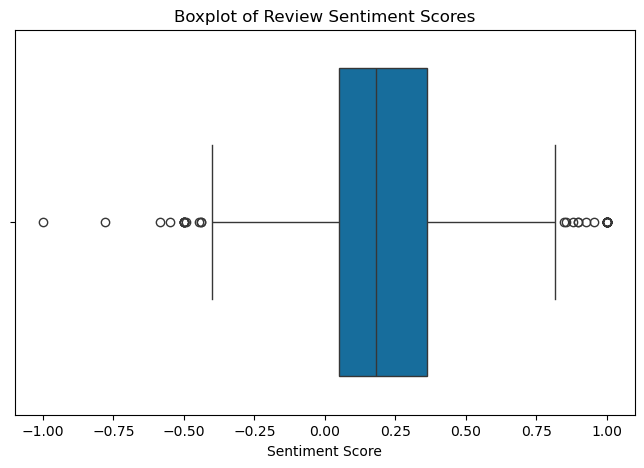

In [190]:
# Create a boxplot to review sentiment scores
plt.figure(figsize=(8, 5))
sns.boxplot(x=df4["review_polarity"], palette="colorblind")

plt.title("Boxplot of Review Sentiment Scores")
plt.xlabel("Sentiment Score")

plt.show()

In [191]:
# Count the number of positive and negative reviews per product
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = sia.polarity_scores(text)["compound"]
    return score

df4["sentiment_score"] = df4["review"].apply(get_sentiment_score)

df4["sentiment"] = df4["sentiment_score"].apply(
    lambda x: "positive" if x > 0.05 else (
        "negative" if x < -0.05 else "neutral"))

product_sentiment_counts = df4.groupby(
    "product")["sentiment"].value_counts().unstack(fill_value=0)

In [192]:
# Display products with most negative reviews.
most_negative_products = product_sentiment_counts.sort_values(
    by="negative", ascending=False).head(10)

print("Products with the most negative reviews:")
most_negative_products

Products with the most negative reviews:


sentiment  negative  neutral  positive
product                               
2253              4        0         6
3165              4        0         6
486               4        0         6
9597              3        2         5
4047              3        0         7
2795              3        1         6
876               3        1         6
1212              2        0         8
979               2        1         9
6504              2        0         8

In [193]:
# Display products with most positive reviews
most_positive_products = product_sentiment_counts.sort_values(
    by="positive", ascending=False).head(10)

print("Products with the most positive reviews:")
most_positive_products

Products with the most positive reviews:


sentiment  negative  neutral  positive
product                               
1012              1        1        11
3629              0        0        10
6770              0        0        10
2371              0        0        10
2286              0        0        10
6271              0        0        10
6424              0        0        10
2139              0        0        10
6715              0        0        10
1618              0        0        10

In [194]:
# Count sentiment per gender
gender_sentiment_counts = df4.groupby("gender")[
"sentiment"].value_counts().unstack(fill_value=0)
gender_sentiment_counts["total_reviews"] = gender_sentiment_counts.sum(axis=1)

gender_sentiment_percent = gender_sentiment_counts[[
    "positive", "negative", "neutral"]].div(
    gender_sentiment_counts["total_reviews"], axis=0) * 100

result_table = gender_sentiment_counts[[
    "positive", "negative", "neutral", "total_reviews"]].join(
    gender_sentiment_percent, rsuffix="_percent")

final_table = result_table.T.round(1)

print("Review stats per Gender:")
display(final_table)

Review stats per Gender:


gender            Female   Male
sentiment                      
positive           987.0  783.0
negative            78.0   57.0
neutral             55.0   40.0
total_reviews     1120.0  880.0
positive_percent    88.1   89.0
negative_percent     7.0    6.5
neutral_percent      4.9    4.5

In [195]:
# Sentiment per age group in percentage to amount of reviews per age group
age_sentiment_counts = df4.groupby("age")[
"sentiment"].value_counts().unstack(fill_value=0)

age_sentiment_percent = age_sentiment_counts.div(
    age_sentiment_counts.sum(axis=1), axis=0) * 100

age_sentiment_percent["Total Reviews"] = age_sentiment_counts.sum(axis=1)

print("Review sentiment per Age:")
age_sentiment_percent.round(1)

Review sentiment per Age:


sentiment  negative  neutral  positive  Total Reviews
age                                                  
17              6.7      3.3      90.0             30
18              6.2      7.5      86.2             80
19             10.0      0.0      90.0             10
22              8.0      2.0      90.0             50
23              6.0      8.0      86.0             50
24             10.0      0.0      90.0             30
25              6.7      8.3      85.0             60
26              2.5      5.0      92.5             40
27             16.7      6.7      76.7             30
28              5.0      5.0      90.0             20
29              0.9      9.1      90.0            110
32              1.8      6.4      91.8            110
33             10.0      3.8      86.2             80
34              7.3      2.7      90.0            110
35              0.0     10.0      90.0             30
36              2.0      8.0      90.0             50
37             10.0      4.4      85.6             90
38              4.4      4.4      91.1            180
39             11.2      5.0      83.8             80
40             10.0      0.0      90.0             20
41              3.3      6.7      90.0             30
42             10.0      0.0      90.0             20
43             10.0      3.3      86.7             30
44              3.3      6.7      90.0             30
45              3.3      5.0      91.7             60
46              4.0      2.0      94.0             50
49             10.8      4.2      85.0            120
50              0.0      5.0      95.0             20
51              5.0      5.0      90.0             20
52              5.0      5.0      90.0             20
53             10.0      2.5      87.5             40
54              0.0      0.0     100.0             10
55             10.0      0.0      90.0             10
56             10.0      0.0      90.0             20
57             15.0      5.0      80.0             20
58              7.5      2.5      90.0             40
62             13.3     10.0      76.7             30
65             15.0      5.0      80.0             20
66             10.0      0.0      90.0             10
67              5.0      5.0      90.0             20
68             20.0      5.0      75.0             20
69              7.5      0.0      92.5             40
70              6.7      3.3      90.0             30
71              0.0      0.0     100.0             10
72              5.0      0.0      95.0             20

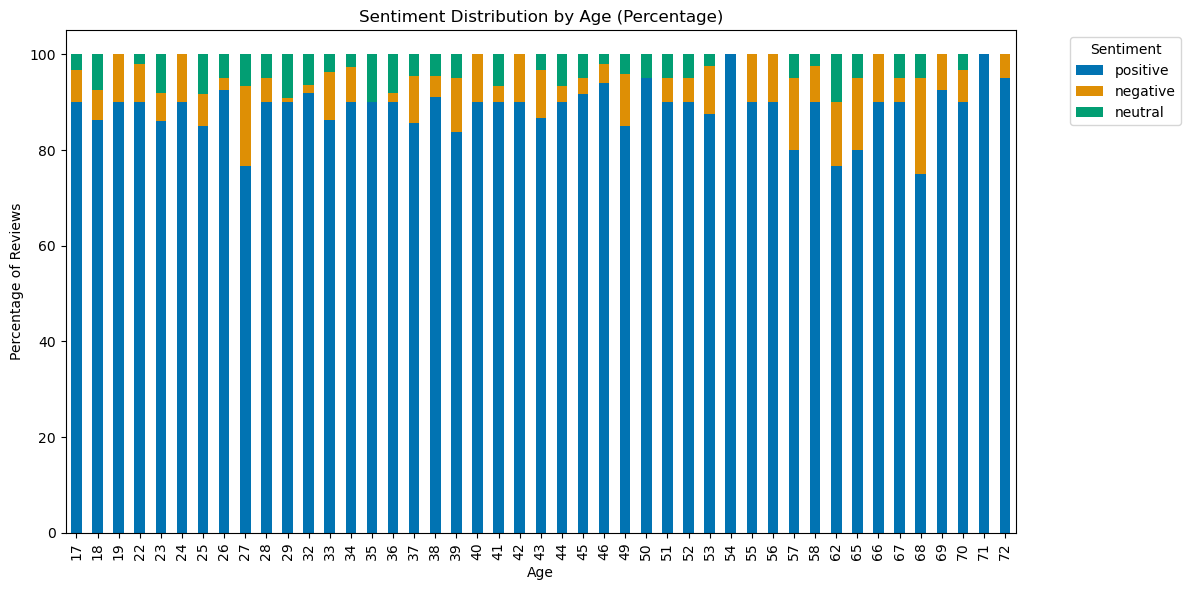

In [196]:
# Plot sentiment per age group
age_sentiment_counts = df4.groupby("age")[
"sentiment"].value_counts().unstack(fill_value=0)

age_sentiment_percent = age_sentiment_counts.div(age_sentiment_counts.sum(
    axis=1), axis=0) * 100

age_sentiment_percent[["positive", "negative", "neutral"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), 
    color=sns.color_palette("colorblind"))

plt.title("Sentiment Distribution by Age (Percentage)")
plt.xlabel("Age")
plt.ylabel("Percentage of Reviews")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [197]:
# Display the top 5 age groups with the highest positive review percentages

age_sentiment_counts["total_reviews"] = df4.groupby("age")["review"].count()
age_sentiment_counts["positive_percent"] = (
    age_sentiment_counts["positive"] / age_sentiment_counts[
    "total_reviews"]) * 100

top_5_highest_positive = age_sentiment_counts.sort_values(
    "positive_percent", ascending=False).head(5)[[
    "positive_percent", "total_reviews"]]

print("Ages with most Positive Reviews as percentage to total Reviews:")
display(top_5_highest_positive)

Ages with most Positive Reviews as percentage to total Reviews:


sentiment  positive_percent  total_reviews
age                                       
54                    100.0             10
71                    100.0             10
72                     95.0             20
50                     95.0             20
46                     94.0             50

In [198]:
# Display the top 5 age groups with the highest negative review percentages
age_sentiment_counts["negative_percent"] = (
    age_sentiment_counts["negative"] / age_sentiment_counts[
    "total_reviews"]) * 100

top_5_highest_negative = age_sentiment_counts.sort_values(
    "negative_percent", ascending=False).head(5)[[
    "negative_percent", "total_reviews"]]


print("Ages with most Negative Reviews as percentage to total Reviews:")
display(top_5_highest_negative)

Ages with most Negative Reviews as percentage to total Reviews:


sentiment  negative_percent  total_reviews
age                                       
68                20.000000             20
27                16.666667             30
57                15.000000             20
65                15.000000             20
62                13.333333             30

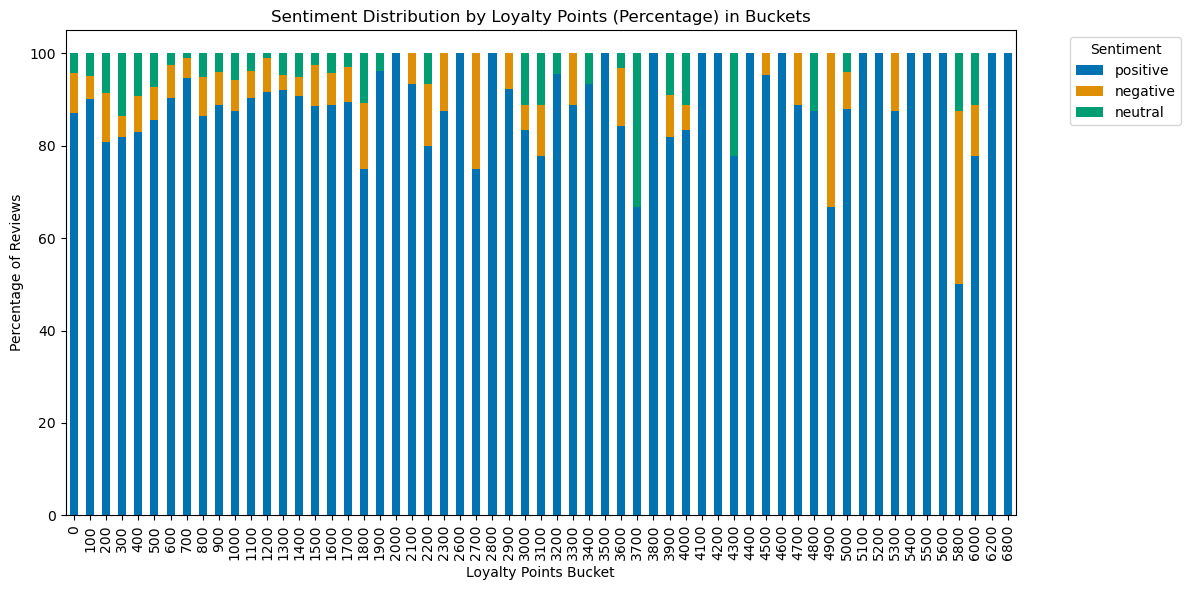

In [199]:
# Display sentiment distribution by loyalty points in buckets of 100
df4["loyalty_points_bucket"] = (df4["loyalty_points"] // 100) * 100

loyalty_sentiment_counts = df4.groupby("loyalty_points_bucket")[
"sentiment"].value_counts().unstack(fill_value=0)

loyalty_sentiment_percent = loyalty_sentiment_counts.div(
    loyalty_sentiment_counts.sum(axis=1), axis=0) * 100

loyalty_sentiment_percent[["positive", "negative", "neutral"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), 
    color=sns.color_palette("colorblind"))

plt.title("Sentiment Distribution by Loyalty Points (Percentage) in Buckets")
plt.xlabel("Loyalty Points Bucket")
plt.ylabel("Percentage of Reviews")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [200]:
# Display the table with top 10 loyalty point buckets, total reviews, and positive percentage
top_10_buckets_reviews = df4[
"loyalty_points_bucket"].value_counts().head(10)

sentiment_counts = df4.groupby("loyalty_points_bucket")[
"sentiment"].value_counts().unstack(fill_value=0)

sentiment_counts["positive_percentage"] = ((
    sentiment_counts["positive"] / sentiment_counts.sum(
        axis=1)) * 100).round(1)

top_10_buckets_with_positive = sentiment_counts.loc[
top_10_buckets_reviews.index, ["positive_percentage"]]
top_10_buckets_with_positive["Total Reviews"] = top_10_buckets_reviews.values

top_10_buckets_with_positive = top_10_buckets_with_positive.reset_index()
top_10_buckets_with_positive.columns = ["Loyalty Points Bucket", 
                                        "Positive Review Percentage", 
                                        "Total Reviews"]

print("Loyalty Point Buckets with most Positive Reviews as Percentage to total Reviews:")
top_10_buckets_with_positive

Loyalty Point Buckets with most Positive Reviews as Percentage to total Reviews:


Loyalty Points Bucket  Positive Review Percentage  Total Reviews
0                   1300                        92.1            151
1                   1100                        90.3            134
2                   1600                        88.8            116
3                   1200                        91.7            109
4                   1000                        87.5            104
5                    900                        88.8             98
6                   1400                        90.8             98
7                    700                        94.7             95
8                      0                        87.1             93
9                    500                        85.5             83

In [201]:
# Check amount of reviews for bucket 5800 due to high percentage of negative reviews
total_reviews_5800 = df4[df4["loyalty_points_bucket"] == 5800].shape[0]
print(f"Total reviews in loyalty point bucket 5800: {total_reviews_5800}")

Total reviews in loyalty point bucket 5800: 8


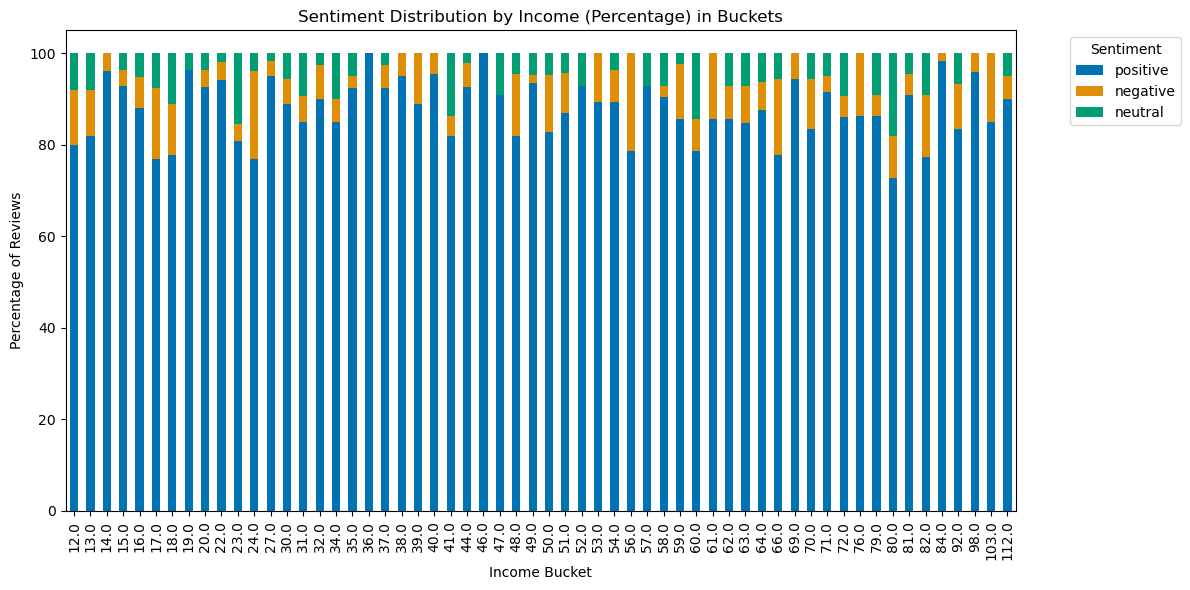

In [202]:
# Plot sentiment distribution by income in buckets of 1k
df4["income_bucket"] = (df4["income"] // 1) * 1

income_sentiment_counts = df4.groupby("income_bucket")[
"sentiment"].value_counts().unstack(fill_value=0)

income_sentiment_percent = income_sentiment_counts.div(
    income_sentiment_counts.sum(axis=1), axis=0) * 100

income_sentiment_percent[["positive", "negative", "neutral"]].plot(
    kind="bar", stacked=True, figsize=(12, 6), 
    color=sns.color_palette("colorblind"))

plt.title("Sentiment Distribution by Income (Percentage) in Buckets")
plt.xlabel("Income Bucket")
plt.ylabel("Percentage of Reviews")
plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [203]:
# Display the table with top 10 loyalty point buckets, total reviews, and positive percentage
top_10_buckets_reviews = df4["income_bucket"].value_counts().head(10)

sentiment_counts = df4.groupby("income_bucket")[
"sentiment"].value_counts().unstack(fill_value=0)

sentiment_counts["positive_percentage"] = ((
    sentiment_counts["positive"] / sentiment_counts.sum(
        axis=1)) * 100).round(1)

top_10_buckets_with_positive = sentiment_counts.loc[
top_10_buckets_reviews.index, ["positive_percentage"]]
top_10_buckets_with_positive["Total Reviews"] = top_10_buckets_reviews.values


top_10_buckets_with_positive = top_10_buckets_with_positive.reset_index()
top_10_buckets_with_positive.columns = ["Income Bucket", 
                                        "Positive Review Percentage", 
                                        "Total Reviews"]

print("Income Buckets with most Positive Reviews as Percentage to total Reviews:")
top_10_buckets_with_positive

Income Buckets with most Positive Reviews as Percentage to total Reviews:


Income Bucket  Positive Review Percentage  Total Reviews
0           44.0                        92.5            134
1           63.0                        84.8            125
2           50.0                        82.8             64
3           39.0                        88.9             63
4           49.0                        93.5             62
5           27.0                        95.0             60
6           71.0                        91.5             59
7           16.0                        87.9             58
8           84.0                        98.3             58
9           15.0                        92.7             55

## 7. Discuss: Insights and observations

Most reviews are mildly positive, but not strongly so. There's a wide range from -1 to 1, covering all sentiment extremes.

The summaries dont add any analytical value whatsoever. A lot of customers use it for a star rating. Should exchange it for an actual 
star rating to incentivies leaving reviews and also add analytical value.

Further exploration in an attempt to further segment the reviews showed that female customers left more reviews than male ones, however,
the percentages of positive, neutral and negative reviews are quite close to eachother. 

For age, loyalty point and income segmentation the ages, loyalty point and income buckets with the lowest percentage of positive reviews have only few
reviews in total, so there isnt any indication of specific "problem group", overall the positive sentiment is dominant.

## Exploration to identify high loyalty customers

In [206]:
# Filter top 25% loyalty point earners
high_loyalty = df4[df4["loyalty_points"] >= df4["loyalty_points"].quantile(0.75)]

profile = high_loyalty.groupby(["gender", "education"]).agg({"loyalty_points": "mean",
    "age": "mean", "income": "mean", "spending_score": "mean",
    "review": "count"}).sort_values(by="loyalty_points", ascending=False).round(1)

print("Customer Information with High Loyalty Points")
profile

Customer Information with High Loyalty Points


loyalty_points   age  income  spending_score  review
gender education                                                         
Female Basic                 4555.0  34.0    79.5            86.0       7
Male   Basic                 3882.1  36.1    64.9            89.4      11
       postgraduate          3730.1  37.2    63.2            85.0      28
       graduate              3584.2  38.4    69.0            76.5     109
Female diploma               3429.9  45.9    71.3            66.7      19
       graduate              3397.5  36.3    67.5            74.8     139
       PhD                   3241.6  37.8    75.1            63.4      67
       postgraduate          3166.4  39.4    65.0            71.5      54
Male   PhD                   3148.1  46.4    69.5            65.0      49
       diploma               3128.2  35.9    65.3            72.6      17

In [207]:
# Aggregate overall averages for high-loyalty customers
profile_overall = high_loyalty.agg({"loyalty_points": "mean", "age": "mean",
    "income": "mean", "spending_score": "mean", "review": "count"}).round(1)

profile_overall = profile_overall.to_frame().T

print("Average Stats of High Loyalty Point Customers:")
profile_overall

Average Stats of High Loyalty Point Customers:


loyalty_points   age  income  spending_score  review
0          3405.5  38.7    68.7            73.0   500.0

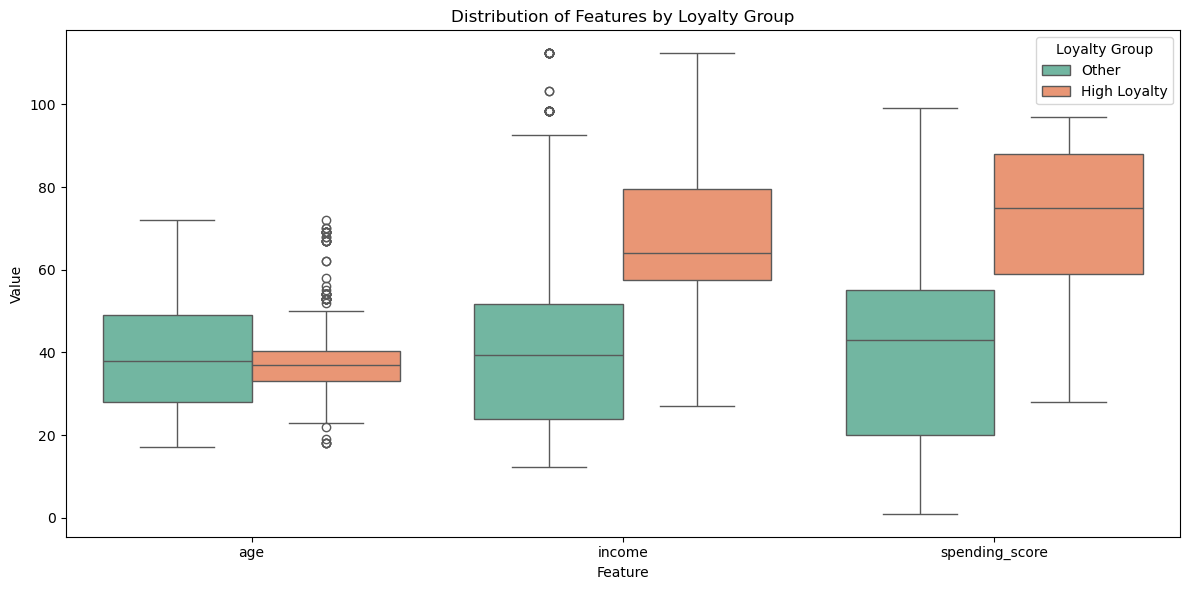

In [208]:
# Plot the features by loyalty group
df4["loyalty_group"] = df4["loyalty_points"].apply(
    lambda x: "High Loyalty" if x >= df4[
    "loyalty_points"].quantile(0.75) else "Other")

# Select relevant columns
boxplot_data = df4[["loyalty_group", "age", "income", "spending_score"]]

# Melt for seaborn
melted = boxplot_data.melt(id_vars="loyalty_group", 
                           value_vars=["age", "income", "spending_score"],
                           var_name="Feature", value_name="Value")

plt.figure(figsize=(12, 6))
sns.boxplot(data=melted, x="Feature", y="Value", 
            hue="loyalty_group", palette="Set2")

plt.title("Distribution of Features by Loyalty Group")
plt.ylabel("Value")
plt.xlabel("Feature")
plt.legend(title="Loyalty Group")
plt.tight_layout()
plt.show()

In [209]:
# Get stats for high loyalty customers and others
income_stats = df4.groupby("loyalty_group")["income"].describe().round(2)

print("Income Stats of High Loyalty Point vs. Other Customers:")
income_stats

Income Stats of High Loyalty Point vs. Other Customers:


count  mean    std    min    25%    50%    75%     max
loyalty_group                                                         
High Loyalty    500.0  68.7  15.83  27.06  57.40  63.96  79.54  112.34
Other          1500.0  41.2  20.99  12.30  23.78  39.36  51.66  112.34

In [210]:
# Display products with most reviews by high loyalty customers
high_loyalty = df4[df4["loyalty_points"] >= df4[
"loyalty_points"].quantile(0.75)]

product_reviews = high_loyalty.groupby("product")[
"review"].count().reset_index()

top_products = product_reviews.sort_values(
    by="review", ascending=False).head(10)

print("Most Reviewed Products by High Loyalty Customers:")
top_products

Most Reviewed Products by High Loyalty Customers:


product  review
81      4415       8
65      3403       8
95      5510       8
132     8962       7
105     6466       7
107     6504       7
79      4399       6
84      4477       6
118     7101       6
99      5758       6

In [211]:
# Display products with most positive reviews by high loyalty customers
high_loyalty = df4[df4["loyalty_points"] >= df4[
"loyalty_points"].quantile(0.75)]

positive_reviews = high_loyalty[high_loyalty[
"sentiment"] == "positive"]

positive_product_reviews = positive_reviews.groupby(
    "product")["review"].count().reset_index()

top_positive_products = positive_product_reviews.sort_values(
    by="review", ascending=False).head(10)

print("Most Positively Reviewed Products by High Loyalty Customers:")
top_positive_products

Most Positively Reviewed Products by High Loyalty Customers:


product  review
61      3403       8
77      4415       7
91      5510       7
128     8962       7
103     6504       6
138    10241       6
80      4477       6
95      5758       6
126     8923       6
136    10232       6

## Discuss: Insights and observations

High loyalty: Most high-loyalty customers are concentrated within an income range of ~57 to 79 (25th to 75th percentile). 
Other: A much broader distribution of incomes (ranging from very low to high), with a significant proportion of users having lower incomes.

Products that seemed to be most interesting (most amount of positive reviews) to high loyalty customers could be promoted as exclusive items.

Insights into the type of item could help identify "top runners" and add similar items to the inventory.

# 